In [ ]:
%matplotlib inline

In [ ]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from numpy import asarray
from numpy import save
from numpy import load

In [ ]:
fichier="/content/drive/MyDrive/projet_long/COMPLETED.csv"
df = pd.read_csv(fichier,sep=";")
df.head()

total_chla_5_0  total_chla_13_92  total_chla_23_23  total_chla_38_75  \
0         0.11300           0.10099           0.06270           0.10800   
1         0.05502           0.09598           0.07766           0.12698   
2         0.06013           0.09598           0.06615           0.10065   
3         0.09600           0.06933           0.07809           0.10100   
4         0.11900           0.09444           0.07927           0.12500   

   total_chla_64_63  total_chla_107_81  total_chla_179_85  DVchla_5_0  \
0           0.12950            0.32933            0.27000      0.0350   
1           0.11784            0.16497            0.09998      0.0058   
2           0.11353            0.13397            0.11259      0.0059   
3           0.10300            0.32500            0.04133      0.0310   
4           0.15650            0.39467            0.14500      0.0390   

   DVchla_13_92  DVchla_23_23  ...  perid_64_63  perid_107_81  perid_179_85  \
0       0.03436       0.01643  ...      0.00100       0.00267       0.00160   
1       0.01405       0.00836  ...      0.00397       0.00164       0.00000   
2       0.01405       0.00284  ...      0.00449       0.00337       0.00174   
3       0.02607       0.03231  ...      0.00100       0.00200       0.00033   
4       0.03202       0.02091  ...      0.00100       0.00200       0.00000   

   zeax_5_0  zeax_13_92  zeax_23_23  zeax_38_75  zeax_64_63  zeax_107_81  \
0   0.06100     0.04182     0.05111     0.05800     0.06850      0.06633   
1   0.01653     0.02721     0.02072     0.02152     0.05140      0.03517   
2   0.01517     0.02721     0.01580     0.03113     0.05335      0.04337   
3   0.04400     0.05369     0.04475     0.04600     0.04700      0.03050   
4   0.05900     0.04671     0.04751     0.06100     0.06050      0.04633   

   zeax_179_85  
0      0.01980  
1      0.00759  
2      0.00858  
3      0.00233  
4      0.00800  

[5 rows x 42 columns]

In [ ]:
data_total_chla=df[['total_chla_5_0','total_chla_13_92', 'total_chla_23_23','total_chla_38_75', 'total_chla_64_63', 'total_chla_107_81','total_chla_179_85']]

In [ ]:
data_DVchla=df[['DVchla_5_0', 'DVchla_13_92', 'DVchla_23_23', 'DVchla_38_75','DVchla_64_63', 'DVchla_107_81', 'DVchla_179_85']]

In [ ]:
data_X19hex=df[['X19hex_5_0', 'X19hex_13_92','X19hex_23_23', 'X19hex_38_75', 'X19hex_64_63', 'X19hex_107_81','X19hex_179_85']]

In [ ]:
data_fucox=df[['fucox_5_0','fucox_13_92', 'fucox_23_23', 'fucox_38_75', 'fucox_64_63','fucox_107_81', 'fucox_179_85']]

In [ ]:
data_perid=df[['perid_5_0', 'perid_13_92', 'perid_23_23', 'perid_38_75','perid_64_63', 'perid_107_81', 'perid_179_85']]

In [ ]:
data_zeax=df[['zeax_5_0', 'zeax_13_92', 'zeax_23_23','zeax_38_75', 'zeax_64_63', 'zeax_107_81', 'zeax_179_85']]

In [ ]:
df.shape

(1614, 42)

### PCA on total_chla

In [ ]:
moyennes_total_chla = data_total_chla.mean(axis=0)

In [ ]:
moyennes_total_chla

total_chla_5_0       0.27656
total_chla_13_92     0.27902
total_chla_23_23     0.29195
total_chla_38_75     0.31151
total_chla_64_63     0.29743
total_chla_107_81    0.19518
total_chla_179_85    0.08481
dtype: float64

In [ ]:
ecartTypes_total_chla = data_total_chla.std(axis=0,ddof=1)

In [ ]:
data_total_chla

total_chla_5_0  total_chla_13_92  total_chla_23_23  total_chla_38_75  \
0            0.11300           0.10099           0.06270           0.10800   
1            0.05502           0.09598           0.07766           0.12698   
2            0.06013           0.09598           0.06615           0.10065   
3            0.09600           0.06933           0.07809           0.10100   
4            0.11900           0.09444           0.07927           0.12500   
...              ...               ...               ...               ...   
1609         0.14100           0.12374           0.13017           0.15300   
1610         0.13265           0.23576           0.14678           0.16651   
1611         0.12876           0.23576           0.13607           0.16736   
1612         0.13300           0.10099           0.06270           0.13500   
1613         0.11700           0.09753           0.10980           0.12900   

      total_chla_64_63  total_chla_107_81  total_chla_179_85  
0              0.12950            0.32933            0.27000  
1              0.11784            0.16497            0.09998  
2              0.11353            0.13397            0.11259  
3              0.10300            0.32500            0.04133  
4              0.15650            0.39467            0.14500  
...                ...                ...                ...  
1609           0.20350            0.35667            0.33620  
1610           0.19928            0.16085            0.09830  
1611           0.20819            0.13943            0.06816  
1612           0.13000            0.37700            0.25880  
1613           0.14400            0.31900            0.14133  

[1614 rows x 7 columns]

In [ ]:
data_total_chla_c = data_total_chla - moyennes_total_chla
data_total_chla_cr = data_total_chla_c / ecartTypes_total_chla
del(data_total_chla_c)
data_total_chla_cr.columns = [str(col) + '_cr' for col in data_total_chla_cr.columns]
data_total_chla_cr

total_chla_5_0_cr  total_chla_13_92_cr  total_chla_23_23_cr  \
0              -0.52482             -0.58793             -0.72466   
1              -0.71086             -0.60447             -0.67739   
2              -0.69448             -0.60447             -0.71376   
3              -0.57937             -0.69250             -0.67602   
4              -0.50557             -0.60957             -0.67229   
...                 ...                  ...                  ...   
1609           -0.43498             -0.51282             -0.51140   
1610           -0.46177             -0.14285             -0.45888   
1611           -0.47424             -0.14285             -0.49275   
1612           -0.46065             -0.58793             -0.72466   
1613           -0.51199             -0.59935             -0.57579   

      total_chla_38_75_cr  total_chla_64_63_cr  total_chla_107_81_cr  \
0                -0.67237             -0.77631               1.02266   
1                -0.60966             -0.83019              -0.23031   
2                -0.69664             -0.85012              -0.46658   
3                -0.69550             -0.89881               0.98963   
4                -0.61621             -0.65149               1.52070   
...                   ...                  ...                   ...   
1609             -0.52370             -0.43421               1.23103   
1610             -0.47908             -0.45373              -0.26169   
1611             -0.47625             -0.41252              -0.42497   
1612             -0.58317             -0.77400               1.38603   
1613             -0.60299             -0.70927               0.94389   

      total_chla_179_85_cr  
0                  1.92916  
1                  0.15807  
2                  0.28941  
3                 -0.45286  
4                  0.62703  
...                    ...  
1609               2.61876  
1610               0.14052  
1611              -0.17336  
1612               1.81249  
1613               0.58884  

[1614 rows x 7 columns]

In [ ]:
# np.isnan(data_total_chla_cr.loc[0,'total_chla_5_0_cr'])

In [ ]:
# data_total_chla_cr=data_total_chla_cr.where(np.isnan(data_total_chla_cr)==False,0)

In [ ]:
# data_total_chla_crNoNan

In [ ]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(data_total_chla_cr)
    lesNouvellesCoordonnees = acp.fit_transform(data_total_chla_cr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
0    -1.60876  1.97765 -0.54751  0.39023  0.06019  0.10944  0.04000
1    -1.51336 -0.16029 -0.35404  0.05085  0.13707  0.00499  0.07612
2    -1.58050 -0.23627 -0.50114  0.23789  0.01180  0.00449  0.07019
3    -1.50431  0.29299  0.17658 -1.10338  0.37015  0.11005 -0.04173
4    -1.40465  1.43732  0.14523 -0.66107  0.27305  0.13193  0.00370
...       ...      ...      ...      ...      ...      ...      ...
1609 -1.30635  2.62930 -0.51612  0.81429 -0.01993  0.00485 -0.01504
1610 -0.88634 -0.14207 -0.29319  0.08443 -0.09814 -0.04908  0.23855
1611 -0.86557 -0.47610 -0.20050  0.00265 -0.11706 -0.03224  0.25480
1612 -1.52798  2.15789 -0.39090  0.12061  0.18301  0.18846  0.02708
1613 -1.36541  0.99809 -0.09378 -0.36908  0.21803  0.05512 -0.03332

[1614 rows x 7 columns]

In [ ]:
dfPCA=plesNouvellesCoordonnees[['CP_1','CP_2']]

In [ ]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(data_total_chla,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [80.02 49.17 36.14 25.55 18.17 10.29  8.66]
 * inerties des axes/facteurs (ordonnées) :
 [6403.5  2417.29 1306.26  652.97  330.05  105.94   74.99]
 * variance des axes/facteurs (ordonnées) :
 [3.97 1.5  0.81 0.4  0.2  0.07 0.05]
 * vecteurs propres :
    v_1  : [ 0.47  0.47  0.48  0.46  0.34 -0.   -0.09]
    v_2  : [ 0.06  0.04  0.03 -0.03  0.05  0.71  0.69]
    v_3  : [-0.27 -0.28 -0.2   0.15  0.75  0.33 -0.33]
    v_4  : [-0.18 -0.17 -0.07  0.3   0.33 -0.59  0.63]
    v_5  : [-0.35 -0.24  0.17  0.74 -0.44  0.19 -0.1 ]
    v_6  : [ 0.58 -0.1  -0.72  0.34 -0.11  0.02 -0.02]
    v_7  : [-0.46  0.78 -0.42  0.12 -0.02  0.02  0.  ]


In [ ]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(data_total_chla_cr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(data_total_chla_cr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[3.97 1.5  0.81 0.4  0.2  0.07 0.05]  (facteurs)
[1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 7.00000000000001  (facteurs)
 - 7.000000000000005  (donnees)


In [ ]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[6403.5  2417.29 1306.26  652.97  330.05  105.94   74.99] (methode 1)
[6403.5  2417.29 1306.26  652.97  330.05  105.94   74.99] (methode 2)
inertie totale :
11291.000000000016 (methode 1)
11291.000000000016 (methode 2)
pourcentages d'inertie :
 [ 56.713  21.409  11.569   5.783   2.923   0.938   0.664]
pourcentages d'inertie (cumules) :
 [ 56.713  78.122  89.691  95.474  98.398  99.336  100.000]


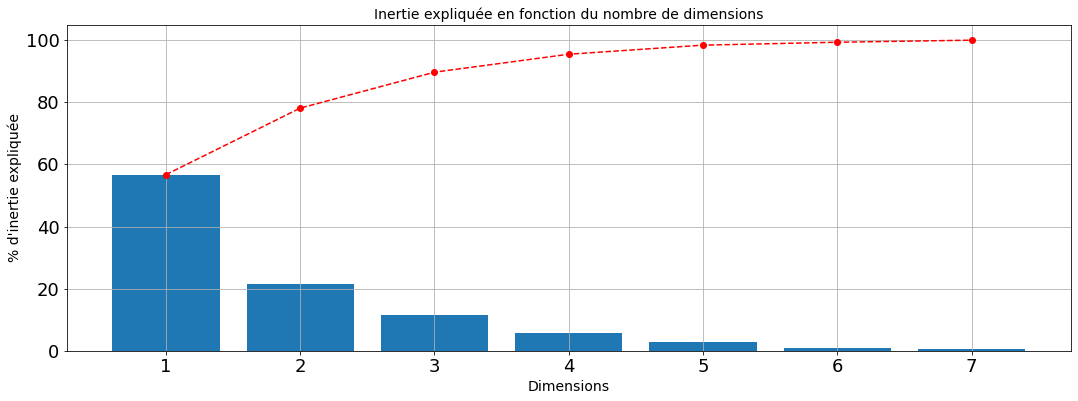

In [ ]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [ ]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1      CP_2     CP_3      CP_4     CP_5     CP_6     CP_7
0     37.14047  56.12557  4.30185   2.18529  0.05199  0.17187  0.02296
1     92.77982   1.04087  5.07777   0.10475  0.76107  0.00101  0.23471
2     87.14014   1.94729  8.76093   1.97423  0.00485  0.00070  0.17186
3     60.37293   2.29013  0.83187  32.48022  3.65531  0.32310  0.04645
4     42.99496  45.01797  0.45963   9.52318  1.62467  0.37928  0.00030
...        ...       ...      ...       ...      ...      ...      ...
1609  17.86990  72.39077  2.78938   6.94318  0.00416  0.00025  0.00237
1610  81.17192   2.08559  8.88199   0.73662  0.99525  0.24893  5.87969
1611  68.37386  20.68618  3.66888   0.00064  1.25055  0.09487  5.92503
1612  32.29976  64.42015  2.11398   0.20126  0.46333  0.49137  0.01014
1613  60.98152  32.58448  0.28765   4.45570  1.55495  0.09939  0.03631

[1614 rows x 7 columns]

In [ ]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100;

In [ ]:
nomDesVariables = list(data_total_chla)

In [ ]:
corrOldNew = np.corrcoef(data_total_chla_cr.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6  \
total_chla_5_0     0.92981  0.07752 -0.24188 -0.11512 -0.16039  0.14925   
total_chla_13_92   0.93976  0.04875 -0.25014 -0.10739 -0.10807 -0.02555   
total_chla_23_23   0.95789  0.03231 -0.17683 -0.04182  0.07777 -0.18502   
total_chla_38_75   0.90721 -0.03888  0.13463  0.19272  0.33444  0.08784   
total_chla_64_63   0.67193  0.05539  0.67884  0.20954 -0.19993 -0.02706   
total_chla_107_81 -0.00403  0.87500  0.29657 -0.37263  0.08657  0.00616   
total_chla_179_85 -0.17367  0.84793 -0.30098  0.39797 -0.04302 -0.00569   

                      CP_7  
total_chla_5_0    -0.09842  
total_chla_13_92   0.16746  
total_chla_23_23  -0.09007  
total_chla_38_75   0.02499  
total_chla_64_63  -0.00325  
total_chla_107_81  0.00371  
total_chla_179_85  0.00033

In [ ]:
PCACoordVars=coordonneesDesVariables[['CP_1','CP_2']]

In [ ]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3      CP_4      CP_5     CP_6  \
total_chla_5_0     86.45460   0.60099   5.85036   1.32531   2.57237  2.22763   
total_chla_13_92   88.31469   0.23767   6.25676   1.15328   1.16785  0.06530   
total_chla_23_23   91.75454   0.10437   3.12682   0.17489   0.60483  3.42329   
total_chla_38_75   82.30307   0.15118   1.81254   3.71427  11.18488  0.77159   
total_chla_64_63   45.14875   0.30684  46.08231   4.39063   3.99717  0.07325   
total_chla_107_81   0.00163  76.56309   8.79536  13.88537   0.74939  0.00379   
total_chla_179_85   3.01621  71.89858   9.05887  15.83802   0.18508  0.00323   

                      CP_7  
total_chla_5_0     0.96874  
total_chla_13_92   2.80444  
total_chla_23_23   0.81126  
total_chla_38_75   0.06247  
total_chla_64_63   0.00106  
total_chla_107_81  0.00138  
total_chla_179_85  0.00001

In [ ]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5      CP_6  \
total_chla_5_0     21.77734   0.40103   7.22418   3.27385  12.57171  33.91593   
total_chla_13_92   22.24588   0.15859   7.72602   2.84888   5.70754   0.99418   
total_chla_23_23   23.11235   0.06965   3.86108   0.43203   2.95594  52.12012   
total_chla_38_75   20.73159   0.10088   2.23817   9.17517  54.66285  11.74762   
total_chla_64_63   11.37267   0.20475  56.90368  10.84594  19.53502   1.11518   
total_chla_107_81   0.00041  51.08881  10.86075  34.30030   3.66242   0.05774   
total_chla_179_85   0.75976  47.97629  11.18613  39.12383   0.90452   0.04922   

                       CP_7  
total_chla_5_0     20.83596  
total_chla_13_92   60.31890  
total_chla_23_23   17.44884  
total_chla_38_75    1.34371  
total_chla_64_63    0.02277  
total_chla_107_81   0.02957  
total_chla_179_85   0.00024

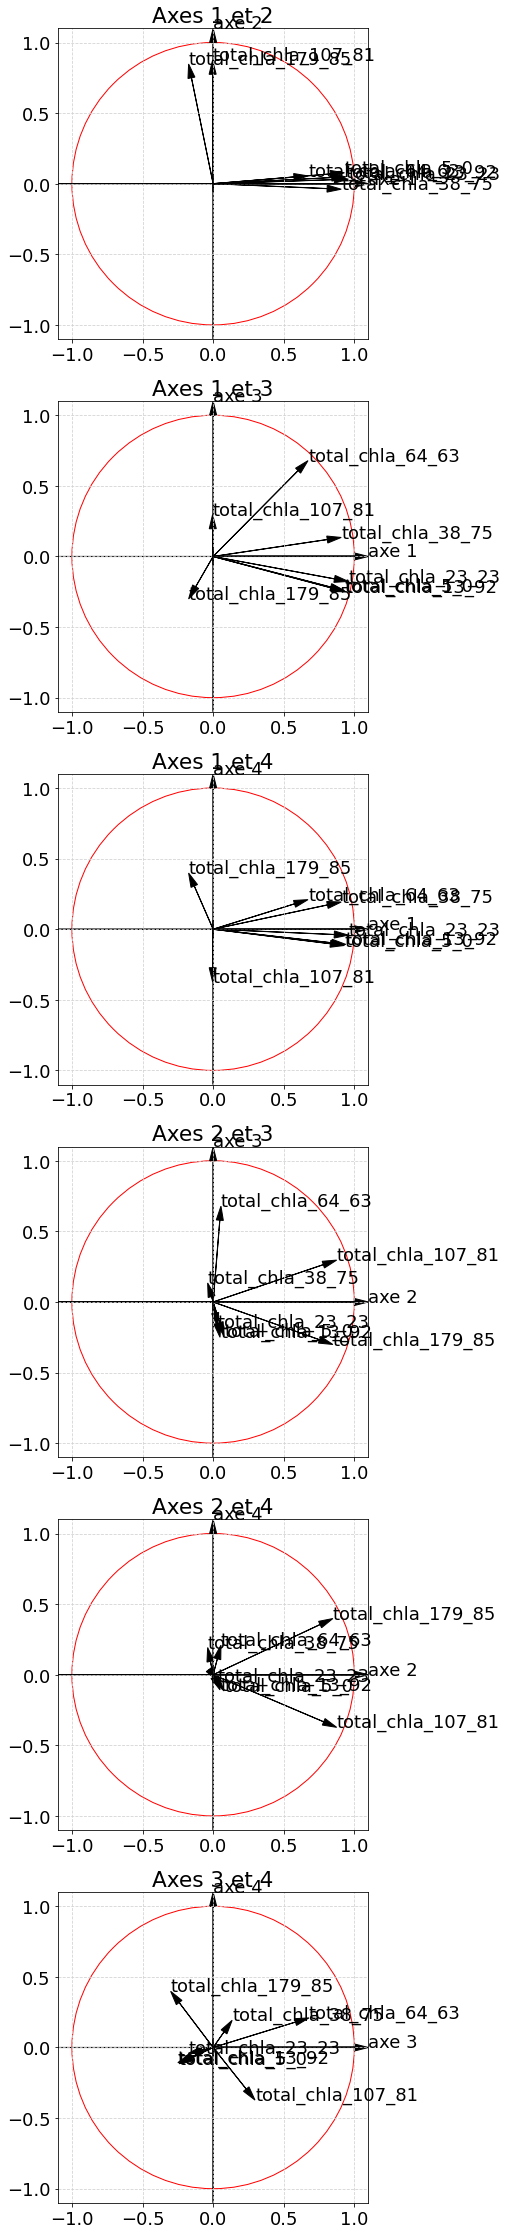

In [ ]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=4
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')

In [ ]:
data_total_chla_cr.shape

(1614, 7)

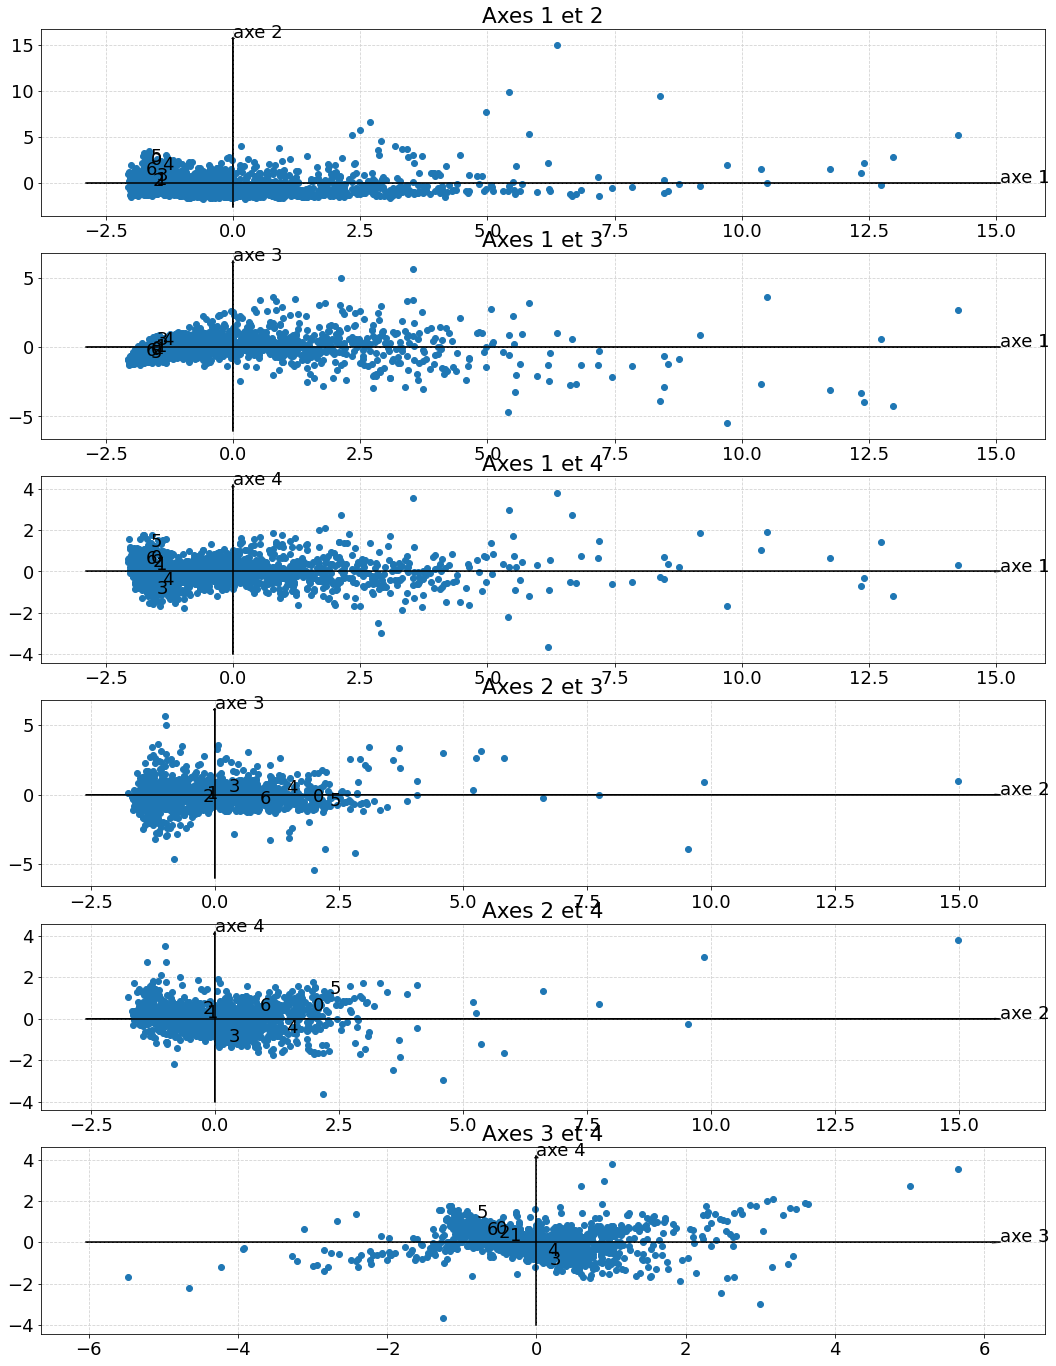

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        for k in range(data_total_chla_cr.shape[1]):
            plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], k)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

### PCA on DVchla

In [ ]:
moyennes_DVchla = data_DVchla.mean(axis=0)

In [ ]:
moyennes_DVchla

DVchla_5_0       0.02583
DVchla_13_92     0.02750
DVchla_23_23     0.02713
DVchla_38_75     0.03105
DVchla_64_63     0.03685
DVchla_107_81    0.03469
DVchla_179_85    0.01598
dtype: float64

In [ ]:
ecartTypes_DVchla = data_DVchla.std(axis=0,ddof=1)

In [ ]:
data_DVchla

DVchla_5_0  DVchla_13_92  DVchla_23_23  DVchla_38_75  DVchla_64_63  \
0         0.0350       0.03436       0.01643       0.03400       0.03950   
1         0.0058       0.01405       0.00836       0.00987       0.03177   
2         0.0059       0.01405       0.00284       0.01510       0.03074   
3         0.0310       0.02607       0.03231       0.03300       0.03600   
4         0.0390       0.03202       0.02091       0.04200       0.05200   
...          ...           ...           ...           ...           ...   
1609      0.0460       0.06001       0.04167       0.05200       0.06850   
1610      0.0000       0.02612       0.00000       0.02778       0.06544   
1611      0.0000       0.02612       0.00000       0.01920       0.06759   
1612      0.0410       0.03436       0.01643       0.04100       0.03900   
1613      0.0380       0.06371       0.03801       0.04100       0.04100   

      DVchla_107_81  DVchla_179_85  
0           0.08850        0.08660  
1           0.04626        0.01550  
2           0.03986        0.01707  
3           0.08500        0.01233  
4           0.10200        0.04440  
...             ...            ...  
1609        0.11050        0.04800  
1610        0.04591        0.02635  
1611        0.04049        0.01223  
1612        0.09350        0.07125  
1613        0.06000        0.04467  

[1614 rows x 7 columns]

In [ ]:
data_DVchla_c = data_DVchla - moyennes_DVchla
data_DVchla_cr = data_DVchla_c / ecartTypes_DVchla
del(data_DVchla_c)
data_DVchla_cr.columns = [str(col) + '_cr' for col in data_DVchla_cr.columns]
data_DVchla_cr

DVchla_5_0_cr  DVchla_13_92_cr  DVchla_23_23_cr  DVchla_38_75_cr  \
0           0.34697          0.25638         -0.38203          0.09647   
1          -0.75728         -0.50290         -0.66977         -0.69230   
2          -0.75362         -0.50290         -0.86679         -0.52128   
3           0.19570         -0.05342          0.18495          0.06378   
4           0.49825          0.16896         -0.22204          0.35793   
...             ...              ...              ...              ...   
1609        0.76298          1.21563          0.51883          0.68476   
1610       -0.97667         -0.05160         -0.96822         -0.10689   
1611       -0.97667         -0.05160         -0.96822         -0.38740   
1612        0.57388          0.25638         -0.38203          0.32525   
1613        0.46043          1.35396          0.38830          0.32525   

      DVchla_64_63_cr  DVchla_107_81_cr  DVchla_179_85_cr  
0             0.07860           1.48432           2.90382  
1            -0.15021           0.31928          -0.01945  
2            -0.18069           0.14277           0.04500  
3            -0.02506           1.38778          -0.14976  
4             0.44879           1.85670           1.16871  
...               ...               ...               ...  
1609          0.93745           2.09116           1.31673  
1610          0.84672           0.30966           0.42659  
1611          0.91036           0.16004          -0.15395  
1612          0.06379           1.62224           2.27268  
1613          0.12302           0.69819           1.17967  

[1614 rows x 7 columns]

In [ ]:
# np.isnan(data_DVchla_cr.loc[0,'DVchla_5_0_cr'])

In [ ]:
# data_DVchla_cr=data_DVchla_cr.where(np.isnan(data_DVchla_cr)==False,0)

In [ ]:
# data_DVchla_crNoNan

In [ ]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(data_DVchla_cr)
    lesNouvellesCoordonnees = acp.fit_transform(data_DVchla_cr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
0     0.88474  3.04031  0.87701  0.28639 -0.06566 -0.16545  0.27175
1    -1.11658  0.55346 -0.50430 -0.14247  0.09296 -0.17232 -0.11451
2    -1.17709  0.50891 -0.41222  0.03683  0.11049 -0.23975  0.11612
3     0.50989  0.65781 -0.61396 -0.88504  0.09730  0.39638  0.09429
4     1.15390  1.91274 -0.36963 -0.37117 -0.07574  0.06157  0.44144
...       ...      ...      ...      ...      ...      ...      ...
1609  2.45908  1.81441 -0.18322 -0.50443  0.21524 -0.32413  0.07014
1610 -0.43795  0.84566 -0.84666  0.68131  0.36824 -0.81738  0.09253
1611 -0.63792  0.37118 -1.11595  0.47579  0.21084 -0.92554 -0.06810
1612  1.04445  2.59776  0.54902 -0.02866 -0.11324 -0.02919  0.54079
1613  1.45811  0.94625  0.80275 -0.27502  0.28887 -0.60746 -0.04510

[1614 rows x 7 columns]

In [ ]:
dfPCA=pd.concat([dfPCA,plesNouvellesCoordonnees[['CP_1','CP_2']]],axis=1)

In [ ]:
dfPCA

CP_1     CP_2     CP_1     CP_2
0    -1.60876  1.97765  0.88474  3.04031
1    -1.51336 -0.16029 -1.11658  0.55346
2    -1.58050 -0.23627 -1.17709  0.50891
3    -1.50431  0.29299  0.50989  0.65781
4    -1.40465  1.43732  1.15390  1.91274
...       ...      ...      ...      ...
1609 -1.30635  2.62930  2.45908  1.81441
1610 -0.88634 -0.14207 -0.43795  0.84566
1611 -0.86557 -0.47610 -0.63792  0.37118
1612 -1.52798  2.15789  1.04445  2.59776
1613 -1.36541  0.99809  1.45811  0.94625

[1614 rows x 4 columns]

In [ ]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(data_DVchla,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [87.43 48.58 25.18 17.96 11.1  10.65  9.65]
 * inerties des axes/facteurs (ordonnées) :
 [7644.12 2360.42  634.16  322.61  123.17  113.33   93.18]
 * variance des axes/facteurs (ordonnées) :
 [4.74 1.46 0.39 0.2  0.08 0.07 0.06]
 * vecteurs propres :
    v_1  : [0.44 0.43 0.43 0.44 0.41 0.26 0.11]
    v_2  : [-0.09 -0.13 -0.21 -0.15  0.03  0.6   0.74]
    v_3  : [ 0.23  0.3   0.19 -0.01 -0.6  -0.44  0.52]
    v_4  : [-0.19 -0.3  -0.07  0.32  0.52 -0.57  0.41]
    v_5  : [-0.79  0.27  0.2   0.45 -0.22  0.14 -0.01]
    v_6  : [ 0.14 -0.74  0.5   0.29 -0.29  0.15 -0.02]
    v_7  : [ 0.27 -0.03 -0.67  0.63 -0.25  0.08 -0.08]


In [ ]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(data_DVchla_cr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(data_DVchla_cr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[4.74 1.46 0.39 0.2  0.08 0.07 0.06]  (facteurs)
[1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 7.00000000000005  (facteurs)
 - 7.000000000000049  (donnees)


In [ ]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[7644.12 2360.42  634.16  322.61  123.17  113.33   93.18] (methode 1)
[7644.12 2360.42  634.16  322.61  123.17  113.33   93.18] (methode 2)
inertie totale :
11291.000000000082 (methode 1)
11291.00000000008 (methode 2)
pourcentages d'inertie :
 [ 67.701  20.905   5.616   2.857   1.091   1.004   0.825]
pourcentages d'inertie (cumules) :
 [ 67.701  88.606  94.223  97.080  98.171  99.175  100.000]


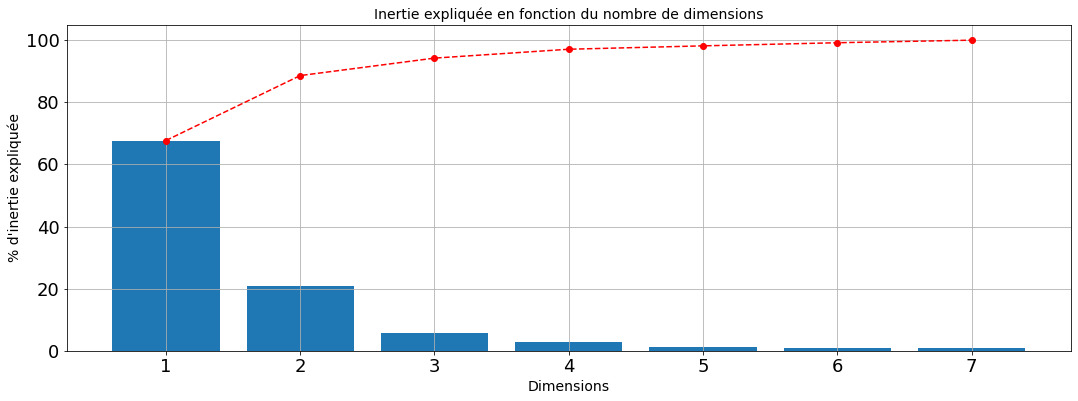

In [ ]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [ ]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1      CP_2      CP_3      CP_4     CP_5      CP_6     CP_7
0      7.12705  84.16209   7.00318   0.74679  0.03925   0.24925  0.67239
1     66.34688  16.30106  13.53389   1.08021  0.45987   1.58026  0.69783
2     72.96212  13.63832   8.94818   0.07143  0.64292   3.02698  0.71005
3     12.81732  21.33232  18.58345  38.61618  0.46672   7.74573  0.43828
4     24.34685  66.89836   2.49830   2.51909  0.10490   0.06931  3.56319
...        ...       ...       ...       ...      ...       ...      ...
1609  61.80885  33.64953   0.34313   2.60081  0.47355   1.07384  0.05028
1610   6.61316  24.65798  24.71666  16.00516  4.67551  23.03630  0.29523
1611  13.92597   4.71489  42.61726   7.74687  1.52126  29.31505  0.15869
1612  12.91349  79.88484   3.56815   0.00972  0.15179   0.01009  3.46192
1613  50.66922  21.33913  15.35768   1.80252  1.98866   8.79431  0.04847

[1614 rows x 7 columns]

In [ ]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100;

In [ ]:
nomDesVariables = list(data_DVchla)

In [ ]:
corrOldNew = np.corrcoef(data_DVchla_cr.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
DVchla_5_0     0.95184 -0.11454  0.14390 -0.08628 -0.21693  0.03743  0.06528
DVchla_13_92   0.93759 -0.15676  0.18568 -0.13346  0.07470 -0.19599 -0.00841
DVchla_23_23   0.93601 -0.25062  0.11814 -0.03310  0.05396  0.13126 -0.16086
DVchla_38_75   0.94920 -0.18599 -0.00536  0.14118  0.12484  0.07562  0.15221
DVchla_64_63   0.88781  0.04031 -0.37674  0.23432 -0.06112 -0.07666 -0.06103
DVchla_107_81  0.57529  0.72295 -0.27791 -0.25640  0.03859  0.03990  0.01815
DVchla_179_85  0.24027  0.89666  0.32376  0.18187 -0.00204 -0.00584 -0.01841

In [ ]:
PCACoordVars.columns

Index(['CP_1', 'CP_2'], dtype='object')

In [ ]:
PCACoordVars.reset_index(drop=True, inplace=True)
coordonneesDesVariables.reset_index(drop=True, inplace=True)
PCACoordVars=pd.concat([PCACoordVars,coordonneesDesVariables[['CP_1','CP_2']]],axis=1)

In [ ]:
PCACoordVars

CP_1     CP_2     CP_1     CP_2
0  0.92981  0.07752  0.95184 -0.11454
1  0.93976  0.04875  0.93759 -0.15676
2  0.95789  0.03231  0.93601 -0.25062
3  0.90721 -0.03888  0.94920 -0.18599
4  0.67193  0.05539  0.88781  0.04031
5 -0.00403  0.87500  0.57529  0.72295
6 -0.17367  0.84793  0.24027  0.89666

In [ ]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3     CP_4     CP_5     CP_6     CP_7
0  90.60083   1.31199   2.07066  0.74435  4.70586  0.14012  0.42618
1  87.90763   2.45751   3.44771  1.78106  0.55794  3.84107  0.00708
2  87.61228   6.28089   1.39576  0.10956  0.29115  1.72280  2.58756
3  90.09751   3.45933   0.00287  1.99317  1.55841  0.57183  2.31687
4  78.82002   0.16247  14.19326  5.49049  0.37351  0.58775  0.37250
5  33.09600  52.26559   7.72324  6.57407  0.14890  0.15924  0.03296
6   5.77301  80.39946  10.48200  3.30781  0.00042  0.00341  0.03390

In [ ]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5      CP_6      CP_7
0  19.11784   0.89655   5.26679   3.72165  61.62575   1.99422   7.37720
1  18.54954   1.67935   8.76934   8.90506   7.30658  54.66763   0.12249
2  18.48722   4.29207   3.55014   0.54781   3.81273  24.51956  44.79048
3  19.01163   2.36395   0.00730   9.96561  20.40823   8.13859  40.10471
4  16.63195   0.11102  36.10092  27.45175   4.89134   8.36513   6.44788
5   6.98364  35.71585  19.64427  32.86950   1.94992   2.26635   0.57046
6   1.21817  54.94121  26.66124  16.53862   0.00545   0.04852   0.58678

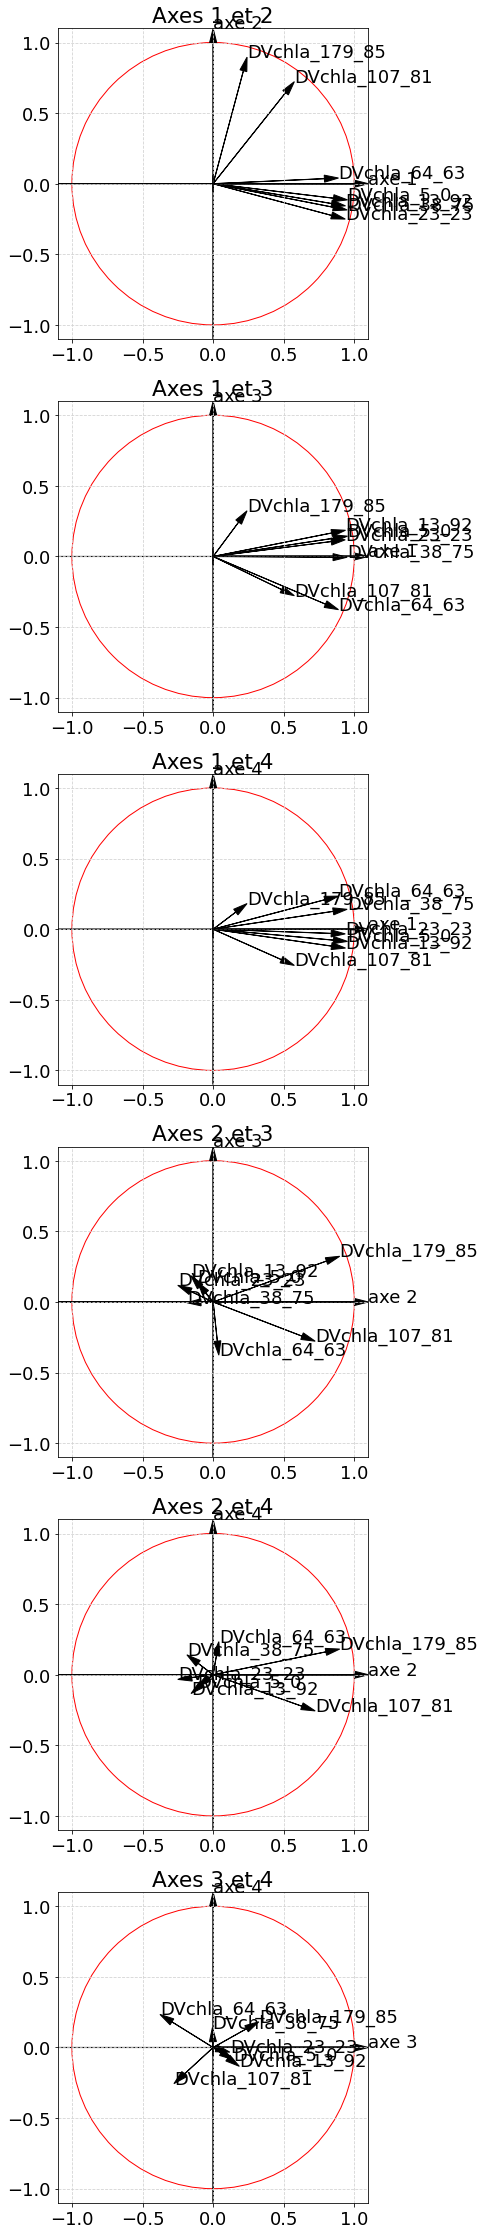

In [ ]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=4
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')

In [ ]:
data_DVchla_cr.shape

(1614, 7)

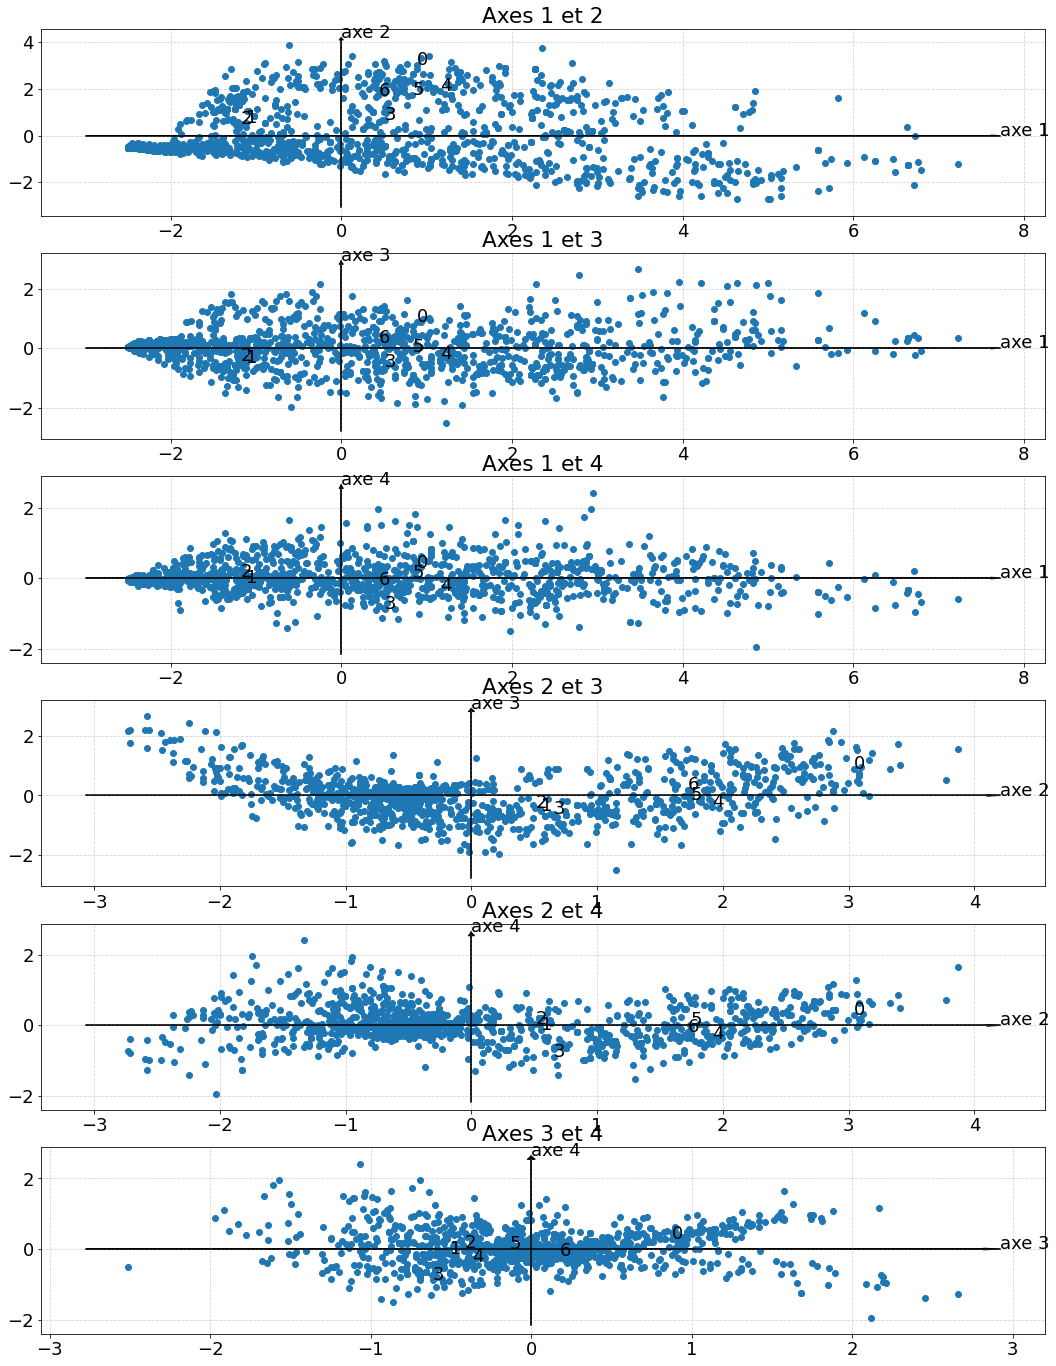

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        for k in range(data_DVchla_cr.shape[1]):
            plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], k)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

### PCA on X19hex

In [ ]:
moyennes_X19hex = data_X19hex.mean(axis=0)

In [ ]:
moyennes_X19hex

X19hex_5_0       0.06511
X19hex_13_92     0.06948
X19hex_23_23     0.07273
X19hex_38_75     0.07837
X19hex_64_63     0.07850
X19hex_107_81    0.05281
X19hex_179_85    0.02183
dtype: float64

In [ ]:
ecartTypes_X19hex = data_X19hex.std(axis=0,ddof=1)

In [ ]:
data_X19hex

X19hex_5_0  X19hex_13_92  X19hex_23_23  X19hex_38_75  X19hex_64_63  \
0        0.01100       0.02155       0.01595       0.01000       0.01550   
1        0.02372       0.02627       0.03312       0.06244       0.04502   
2        0.02525       0.02627       0.02906       0.04957       0.04250   
3        0.01000       0.01551       0.01355       0.01100       0.01200   
4        0.00800       0.01242       0.01132       0.00800       0.01500   
...          ...           ...           ...           ...           ...   
1609     0.01400       0.02466       0.02512       0.01700       0.02500   
1610     0.06917       0.07503       0.07283       0.06445       0.06285   
1611     0.06899       0.07503       0.07216       0.07098       0.06326   
1612     0.01500       0.02155       0.01595       0.01600       0.01600   
1613     0.01200       0.01487       0.01362       0.01500       0.02300   

      X19hex_107_81  X19hex_179_85  
0           0.03567        0.03480  
1           0.08146        0.04982  
2           0.06280        0.06368  
3           0.07600        0.01067  
4           0.06133        0.02740  
...             ...            ...  
1609        0.04867        0.05360  
1610        0.07122        0.04544  
1611        0.05974        0.03314  
1612        0.03767        0.03120  
1613        0.05100        0.03700  

[1614 rows x 7 columns]

In [ ]:
data_X19hex_c = data_X19hex - moyennes_X19hex
data_X19hex_cr = data_X19hex_c / ecartTypes_X19hex
del(data_X19hex_c)
data_X19hex_cr.columns = [str(col) + '_cr' for col in data_X19hex_cr.columns]
data_X19hex_cr

X19hex_5_0_cr  X19hex_13_92_cr  X19hex_23_23_cr  X19hex_38_75_cr  \
0          -0.86492         -0.75023         -0.85709         -1.00540   
1          -0.66159         -0.67641         -0.59788         -0.23430   
2          -0.63711         -0.67641         -0.65924         -0.42356   
3          -0.88090         -0.84479         -0.89331         -0.99069   
4          -0.91287         -0.89319         -0.92693         -1.03481   
...             ...              ...              ...              ...   
1609       -0.81696         -0.70161         -0.71862         -0.90246   
1610        0.06484          0.08679          0.00146         -0.20468   
1611        0.06197          0.08679         -0.00870         -0.10872   
1612       -0.80098         -0.75023         -0.85709         -0.91717   
1613       -0.84893         -0.85484         -0.89221         -0.93187   

      X19hex_64_63_cr  X19hex_107_81_cr  X19hex_179_85_cr  
0            -1.10928          -0.47871           0.60783  
1            -0.58948           0.79961           1.31185  
2            -0.63384           0.27863           1.96172  
3            -1.17091           0.64723          -0.52334  
4            -1.11808           0.23780           0.26098  
...               ...               ...               ...  
1609         -0.94200          -0.11580           1.48902  
1610         -0.27557           0.51383           1.10658  
1611         -0.26832           0.19330           0.52981  
1612         -1.10047          -0.42288           0.43909  
1613         -0.97721          -0.05066           0.71095  

[1614 rows x 7 columns]

In [ ]:
# np.isnan(data_X19hex_cr.loc[0,'X19hex_5_0_cr'])

In [ ]:
# data_X19hex_cr=data_X19hex_cr.where(np.isnan(data_X19hex_cr)==False,0)

In [ ]:
# data_X19hex_crNoNan

In [ ]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(data_X19hex_cr)
    lesNouvellesCoordonnees = acp.fit_transform(data_X19hex_cr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
0    -2.12379 -0.15960  0.58445  0.04396 -0.02323  0.06800 -0.02911
1    -1.37901  1.32615  0.32358  0.20187  0.43446 -0.14154 -0.02834
2    -1.63944  1.33216  0.89931  0.69771  0.13460 -0.16907 -0.02180
3    -1.94734 -0.02481 -0.44221 -1.09675  0.37217  0.05724 -0.00102
4    -2.15730  0.16418  0.08116 -0.46621  0.17373  0.02472  0.01609
...       ...      ...      ...      ...      ...      ...      ...
1609 -2.03342  0.69569  0.91188  0.39041 -0.04570  0.05494  0.02564
1610 -0.27707  1.04091  0.67205  0.04298 -0.05406 -0.03763  0.00087
1611 -0.16013  0.43555  0.44088 -0.04080  0.00142 -0.03107 -0.03139
1612 -2.01998 -0.22426  0.47585 -0.04861  0.04354  0.00748 -0.03901
1613 -2.09029  0.24852  0.37926 -0.01258  0.05543 -0.02553  0.00577

[1614 rows x 7 columns]

In [ ]:
dfPCA=pd.concat([dfPCA,plesNouvellesCoordonnees[['CP_1','CP_2']]],axis=1)

In [ ]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(data_X19hex,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [82.18 46.92 35.66 24.6  16.05 11.08  8.89]
 * inerties des axes/facteurs (ordonnées) :
 [6753.19 2201.49 1271.44  605.33  257.68  122.8    79.08]
 * variance des axes/facteurs (ordonnées) :
 [4.19 1.36 0.79 0.38 0.16 0.08 0.05]
 * vecteurs propres :
    v_1  : [ 0.45  0.46  0.47  0.45  0.36  0.06 -0.17]
    v_2  : [-0.02  0.02  0.01 -0.02  0.17  0.76  0.63]
    v_3  : [ 0.26  0.3   0.22 -0.07 -0.59 -0.34  0.57]
    v_4  : [-0.26 -0.21 -0.03  0.37  0.49 -0.51  0.5 ]
    v_5  : [-0.32 -0.21  0.14  0.73 -0.49  0.2  -0.09]
    v_6  : [-0.72  0.41  0.49 -0.25  0.06 -0.01 -0.05]
    v_7  : [ 0.17 -0.66  0.69 -0.23  0.02  0.    0.  ]


In [ ]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(data_X19hex_cr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(data_X19hex_cr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[4.19 1.36 0.79 0.38 0.16 0.08 0.05]  (facteurs)
[1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 6.999999999999997  (facteurs)
 - 6.999999999999997  (donnees)


In [ ]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[6753.19 2201.49 1271.44  605.33  257.68  122.8    79.08] (methode 1)
[6753.19 2201.49 1271.44  605.33  257.68  122.8    79.08] (methode 2)
inertie totale :
11290.999999999996 (methode 1)
11290.999999999998 (methode 2)
pourcentages d'inertie :
 [ 59.810  19.498  11.261   5.361   2.282   1.088   0.700]
pourcentages d'inertie (cumules) :
 [ 59.810  79.308  90.569  95.930  98.212  99.300  100.000]


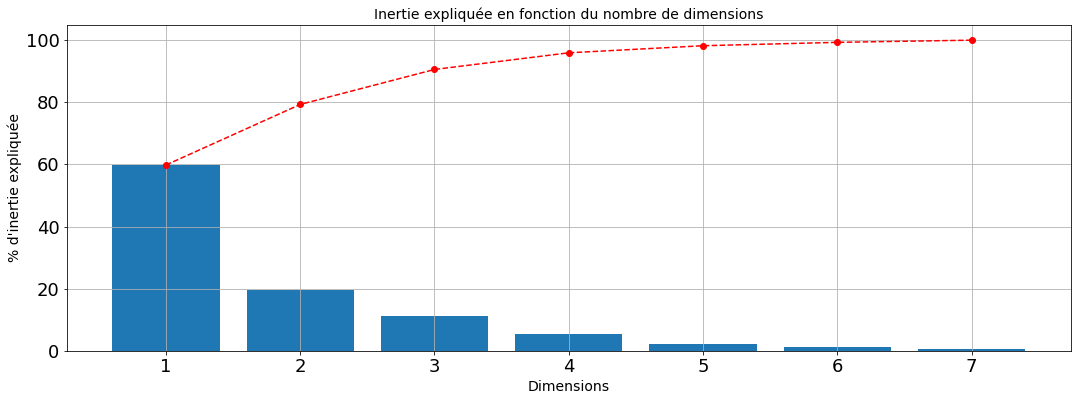

In [ ]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [ ]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1      CP_2      CP_3      CP_4     CP_5     CP_6     CP_7
0     92.32433   0.52138   6.99170   0.03956  0.01105  0.09464  0.01734
1     47.35961  43.79822   2.60758   1.01483  4.70083  0.49893  0.02000
2     46.29964  30.57040  13.93161   8.38568  0.31209  0.49240  0.00819
3     71.10750   0.01154   3.66685  22.55540  2.59724  0.06145  0.00002
4     94.28785   0.54608   0.13343   4.40351  0.61151  0.01238  0.00524
...        ...       ...       ...       ...      ...      ...      ...
1609  73.72378   8.62963  14.82610   2.71772  0.03724  0.05382  0.01172
1610   4.74440  66.96122  27.91207   0.11414  0.18060  0.08752  0.00005
1611   6.20337  45.89564  47.02567   0.40283  0.00049  0.23358  0.23841
1612  93.52354   1.15275   5.18994   0.05416  0.04345  0.00128  0.03488
1613  95.42422   1.34890   3.14138   0.00345  0.06709  0.01423  0.00073

[1614 rows x 7 columns]

In [ ]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100;

In [ ]:
nomDesVariables = list(data_X19hex)

In [ ]:
corrOldNew = np.corrcoef(data_X19hex_cr.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
X19hex_5_0     0.92852 -0.02253  0.23346 -0.15701 -0.12986 -0.19971  0.03798
X19hex_13_92   0.93171  0.02515  0.26953 -0.12990 -0.08588  0.11294 -0.14710
X19hex_23_23   0.95729  0.00991  0.19672 -0.02099  0.05497  0.13444  0.15252
X19hex_38_75   0.92313 -0.02294 -0.05899  0.22390  0.29340 -0.07033 -0.05157
X19hex_64_63   0.74423  0.19934 -0.52568  0.30217 -0.19611  0.01632  0.00486
X19hex_107_81  0.12631  0.88794 -0.30092 -0.31383  0.08093 -0.00381  0.00035
X19hex_179_85 -0.34365  0.73137  0.50202  0.30559 -0.03740 -0.01389  0.00079

In [ ]:
PCACoordVars.reset_index(drop=True, inplace=True)
coordonneesDesVariables.reset_index(drop=True, inplace=True)
PCACoordVars=pd.concat([PCACoordVars,coordonneesDesVariables[['CP_1','CP_2']]],axis=1)

In [ ]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3     CP_4     CP_5     CP_6     CP_7
0  86.21438   0.05078   5.45029  2.46537  1.68645  3.98850  0.14423
1  86.80765   0.06326   7.26470  1.68747  0.73753  1.27552  2.16387
2  91.64070   0.00982   3.86978  0.04405  0.30213  1.80729  2.32624
3  85.21735   0.05261   0.34797  5.01309  8.60840  0.49467  0.26592
4  55.38710   3.97361  27.63389  9.13063  3.84576  0.02665  0.00236
5   1.59551  78.84428   9.05501  9.84874  0.65500  0.00145  0.00001
6  11.80973  53.48961  25.20284  9.33859  0.13988  0.01930  0.00006

In [ ]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5      CP_6      CP_7
0  20.59232   0.03721   6.91446   6.56943  10.55671  52.38807   2.94180
1  20.73403   0.04635   9.21630   4.49657   4.61671  16.75369  44.13634
2  21.88840   0.00720   4.90936   0.11737   1.89123  23.73830  47.44815
3  20.35418   0.03855   0.44144  13.35828  53.88623   6.49735   5.42397
4  13.22922   2.91141  35.05750  24.33022  24.07339   0.35005   0.04820
5   0.38109  57.76816  11.48756  26.24376   4.10015   0.01903   0.00025
6   2.82076  39.19113  31.97337  24.88437   0.87559   0.25351   0.00128

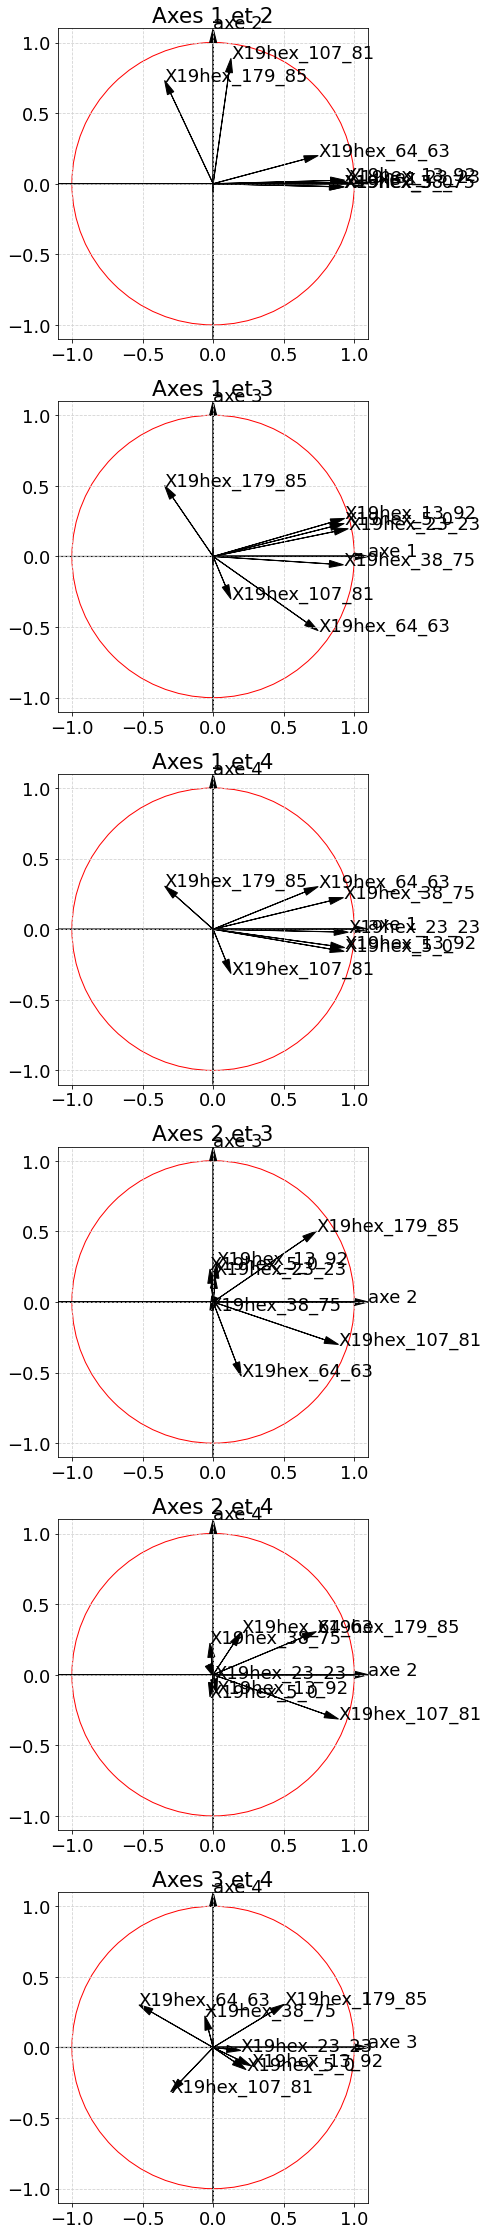

In [ ]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=4
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')

In [ ]:
data_X19hex_cr.shape

(1614, 7)

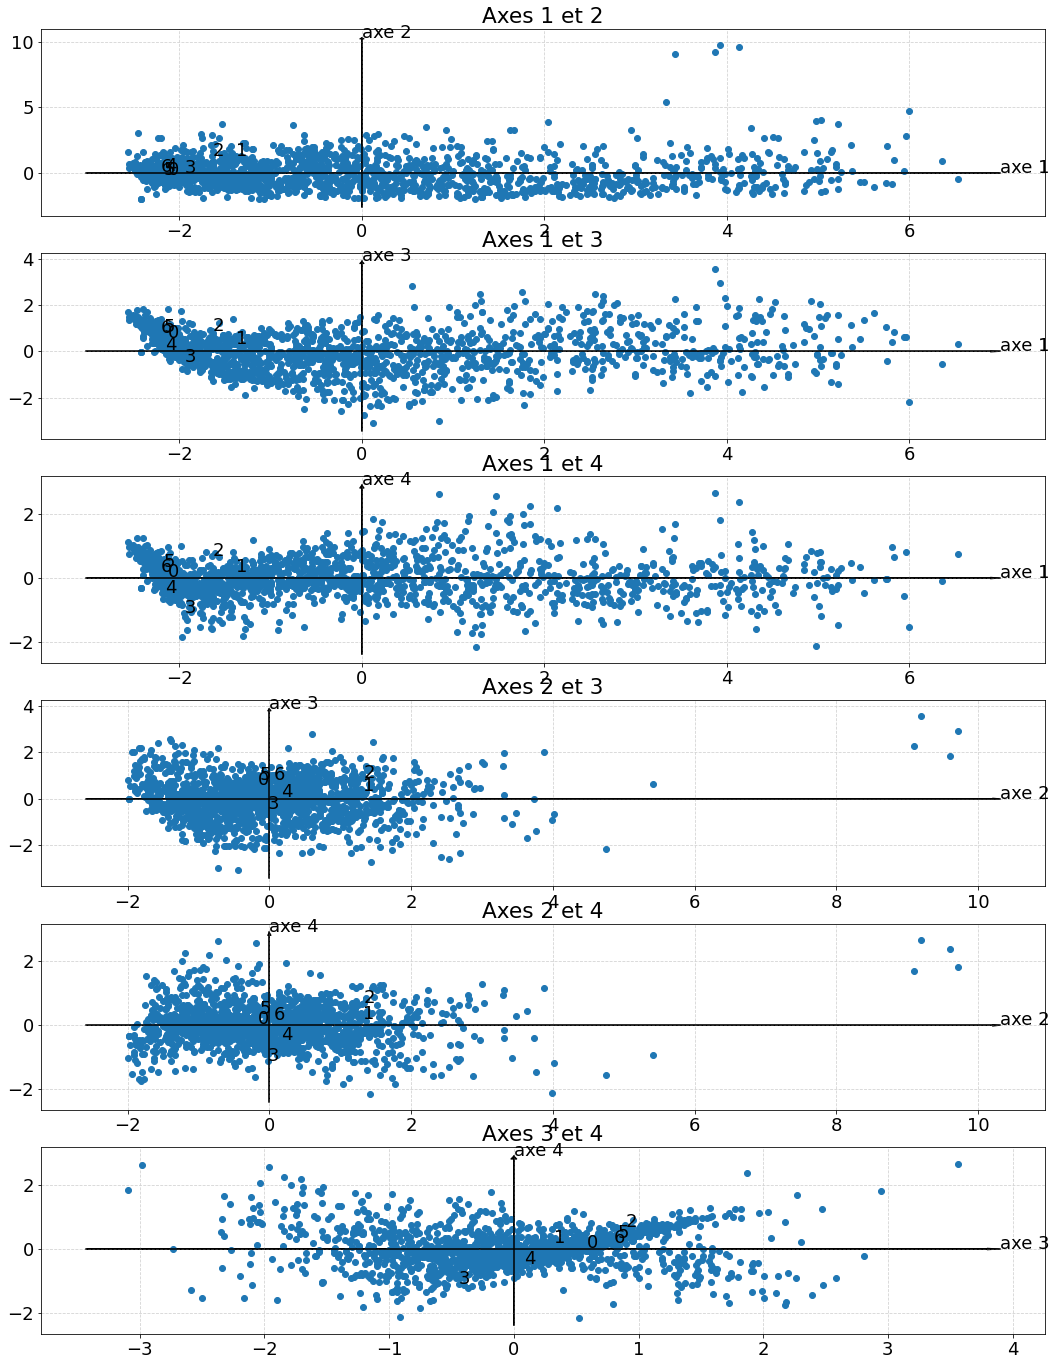

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        for k in range(data_X19hex_cr.shape[1]):
            plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], k)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

### PCA on fucox

In [ ]:
moyennes_fucox = data_fucox.mean(axis=0)

In [ ]:
moyennes_fucox

fucox_5_0       0.03585
fucox_13_92     0.03924
fucox_23_23     0.04142
fucox_38_75     0.04374
fucox_64_63     0.04048
fucox_107_81    0.02177
fucox_179_85    0.00781
dtype: float64

In [ ]:
ecartTypes_fucox = data_fucox.std(axis=0,ddof=1)

In [ ]:
data_fucox

fucox_5_0  fucox_13_92  fucox_23_23  fucox_38_75  fucox_64_63  \
0       0.00300      0.00949      0.00418      0.00300      0.00350   
1       0.00271      0.00741      0.00359      0.01246      0.00621   
2       0.00347      0.00741      0.00378      0.00419      0.00529   
3       0.00700      0.00265      0.00350      0.00800      0.00600   
4       0.00600      0.00473      0.00440      0.00700      0.00800   
...         ...          ...          ...          ...          ...   
1609    0.00300      0.00363      0.00948      0.00300      0.00400   
1610    0.01225      0.02175      0.01421      0.01493      0.01368   
1611    0.01218      0.02175      0.01277      0.01736      0.01393   
1612    0.00500      0.00949      0.00418      0.00400      0.00500   
1613    0.00700      0.00196      0.01158      0.00800      0.01100   

      fucox_107_81  fucox_179_85  
0          0.00633       0.00920  
1          0.00780       0.00465  
2          0.00504       0.00486  
3          0.00800       0.00100  
4          0.00867       0.00280  
...            ...           ...  
1609       0.00500       0.00320  
1610       0.00758       0.00395  
1611       0.00708       0.00272  
1612       0.00600       0.00380  
1613       0.01150       0.00633  

[1614 rows x 7 columns]

In [ ]:
data_fucox_c = data_fucox - moyennes_fucox
data_fucox_cr = data_fucox_c / ecartTypes_fucox
del(data_fucox_c)
data_fucox_cr.columns = [str(col) + '_cr' for col in data_fucox_cr.columns]
data_fucox_cr

fucox_5_0_cr  fucox_13_92_cr  fucox_23_23_cr  fucox_38_75_cr  \
0         -0.41801        -0.35092        -0.41613        -0.46366   
1         -0.42170        -0.37553        -0.42279        -0.35599   
2         -0.41198        -0.37553        -0.42057        -0.45010   
3         -0.36711        -0.43169        -0.42374        -0.40675   
4         -0.37984        -0.40718        -0.41369        -0.41814   
...            ...             ...             ...             ...   
1609      -0.41801        -0.42007        -0.35687        -0.46366   
1610      -0.30036        -0.20628        -0.30409        -0.32793   
1611      -0.30120        -0.20628        -0.32019        -0.30025   
1612      -0.39256        -0.35092        -0.41613        -0.45228   
1613      -0.36711        -0.43982        -0.33342        -0.40675   

      fucox_64_63_cr  fucox_107_81_cr  fucox_179_85_cr  
0           -0.53037         -0.33123          0.06100  
1           -0.49148         -0.29977         -0.13890  
2           -0.50466         -0.35891         -0.12939  
3           -0.49451         -0.29546         -0.29904  
4           -0.46583         -0.28115         -0.22001  
...              ...              ...              ...  
1609        -0.52320         -0.35984         -0.20245  
1610        -0.38445         -0.30451         -0.16964  
1611        -0.38080         -0.31525         -0.22355  
1612        -0.50885         -0.33838         -0.17610  
1613        -0.42281         -0.22034         -0.06487  

[1614 rows x 7 columns]

In [ ]:
# np.isnan(data_fucox_cr.loc[0,'fucox_5_0_cr'])

In [ ]:
# data_fucox_cr=data_fucox_cr.where(np.isnan(data_fucox_cr)==False,0)

In [ ]:
# data_fucox_crNoNan

In [ ]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(data_fucox_cr)
    lesNouvellesCoordonnees = acp.fit_transform(data_fucox_cr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
0    -0.96381  0.14567  0.34722 -0.08312 -0.01578 -0.03697 -0.03872
1    -0.96731  0.04573  0.16832 -0.02941  0.07435  0.00262 -0.05038
2    -1.02094  0.02610  0.21257 -0.03664 -0.00465 -0.01930 -0.02343
3    -1.03531 -0.03531  0.07774  0.05657  0.04491  0.05310  0.01429
4    -0.99321  0.02047  0.10894  0.02712  0.02119  0.02343  0.00434
...       ...      ...      ...      ...      ...      ...      ...
1609 -1.04873 -0.01876  0.18117  0.00304  0.02307 -0.04175  0.04954
1610 -0.75560 -0.07287  0.14235  0.00259 -0.01618 -0.03954 -0.06112
1611 -0.76858 -0.11107  0.10271  0.00770  0.00224 -0.02469 -0.07775
1612 -1.01068 -0.00162  0.19110  0.00983 -0.01026 -0.01395 -0.03207
1613 -0.88433  0.13847  0.16637 -0.02039  0.02977  0.00102  0.07854

[1614 rows x 7 columns]

In [ ]:
dfPCA=pd.concat([dfPCA,plesNouvellesCoordonnees[['CP_1','CP_2']]],axis=1)

In [ ]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(data_fucox,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [89.48 42.61 26.93 19.24 14.95  9.39  7.87]
 * inerties des axes/facteurs (ordonnées) :
 [8006.18 1815.57  725.31  370.35  223.4    88.2    62.  ]
 * variance des axes/facteurs (ordonnées) :
 [4.96 1.13 0.45 0.23 0.14 0.05 0.04]
 * vecteurs propres :
    v_1  : [0.41 0.41 0.42 0.41 0.37 0.3  0.29]
    v_2  : [-0.29 -0.27 -0.24 -0.18  0.16  0.63  0.58]
    v_3  : [ 0.18  0.19  0.13 -0.15 -0.68 -0.22  0.62]
    v_4  : [ 0.16  0.24  0.12 -0.3  -0.42  0.66 -0.45]
    v_5  : [-0.36 -0.27  0.17  0.75 -0.42  0.18 -0.07]
    v_6  : [ 0.71 -0.35 -0.54  0.25 -0.11  0.09 -0.02]
    v_7  : [ 0.24 -0.68  0.64 -0.25  0.05 -0.01 -0.01]


In [ ]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(data_fucox_cr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(data_fucox_cr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[4.96 1.13 0.45 0.23 0.14 0.05 0.04]  (facteurs)
[1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 6.999999999999994  (facteurs)
 - 6.999999999999995  (donnees)


In [ ]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[8006.18 1815.57  725.31  370.35  223.4    88.2    62.  ] (methode 1)
[8006.18 1815.57  725.31  370.35  223.4    88.2    62.  ] (methode 2)
inertie totale :
11290.999999999989 (methode 1)
11290.999999999989 (methode 2)
pourcentages d'inertie :
 [ 70.908  16.080   6.424   3.280   1.979   0.781   0.549]
pourcentages d'inertie (cumules) :
 [ 70.908  86.987  93.411  96.691  98.670  99.451  100.000]


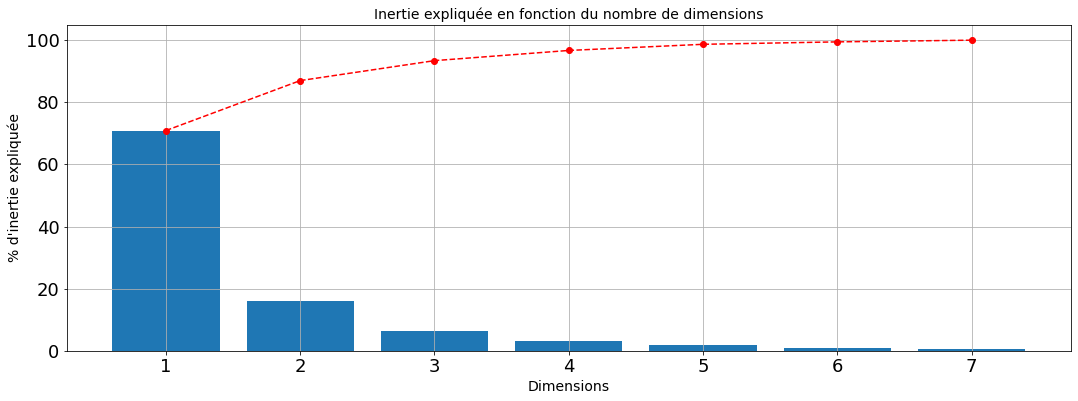

In [ ]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [ ]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1     CP_2      CP_3     CP_4     CP_5     CP_6     CP_7
0     85.95351  1.96332  11.15570  0.63924  0.02304  0.12647  0.13871
1     95.96331  0.21449   2.90552  0.08874  0.56688  0.00070  0.26036
2     95.58408  0.06246   4.14383  0.12313  0.00198  0.03417  0.05035
3     98.57165  0.11466   0.55580  0.29433  0.18552  0.25927  0.01877
4     98.59674  0.04186   1.18626  0.07349  0.04487  0.05489  0.00188
...        ...      ...       ...      ...      ...      ...      ...
1609  96.66748  0.03095   2.88499  0.00081  0.04679  0.15323  0.21575
1610  94.82755  0.88199   3.36576  0.00111  0.04347  0.25972  0.62040
1611  95.22774  1.98860   1.70054  0.00955  0.00081  0.09828  0.97447
1612  96.41816  0.00025   3.44708  0.00911  0.00993  0.01837  0.09710
1613  93.50466  2.29257   3.30951  0.04969  0.10597  0.00012  0.73748

[1614 rows x 7 columns]

In [ ]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100;

In [ ]:
nomDesVariables = list(data_fucox)

In [ ]:
corrOldNew = np.corrcoef(data_fucox_cr.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
fucox_5_0     0.91580 -0.30498  0.12230  0.07674 -0.13297  0.16585  0.04753
fucox_13_92   0.92359 -0.28820  0.12536  0.11734 -0.09875 -0.08296 -0.13343
fucox_23_23   0.94172 -0.25831  0.08590  0.05690  0.06496 -0.12522  0.12620
fucox_38_75   0.92074 -0.19554 -0.10061 -0.14495  0.27753  0.05913 -0.04849
fucox_64_63   0.83477  0.16885 -0.45647 -0.20203 -0.15712 -0.02614  0.00959
fucox_107_81  0.65754  0.66427 -0.15024  0.31452  0.06686  0.02016 -0.00205
fucox_179_85  0.63876  0.61219  0.41298 -0.21438 -0.02589 -0.00504 -0.00179

In [ ]:
PCACoordVars.reset_index(drop=True, inplace=True)
coordonneesDesVariables.reset_index(drop=True, inplace=True)
PCACoordVars=pd.concat([PCACoordVars,coordonneesDesVariables[['CP_1','CP_2']]],axis=1)

In [ ]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3     CP_4     CP_5     CP_6     CP_7
0  83.86920   9.30154   1.49575  0.58889  1.76804  2.75066  0.22591
1  85.30211   8.30576   1.57146  1.37694  0.97516  0.68824  1.78033
2  88.68312   6.67266   0.73796  0.32371  0.42202  1.56794  1.59259
3  84.77641   3.82359   1.01220  2.10100  7.70206  0.34961  0.23513
4  69.68457   2.85100  20.83670  4.08164  2.46857  0.06833  0.00919
5  43.23629  44.12602   2.25724  9.89234  0.44705  0.04063  0.00042
6  40.80153  37.47771  17.05511  4.59575  0.06703  0.00254  0.00032

In [ ]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5      CP_6      CP_7
0  16.89708   8.26376   3.32637   2.56482  12.76568  50.30508   5.87722
1  17.18577   7.37908   3.49474   5.99705   7.04089  12.58675  46.31572
2  17.86694   5.92818   1.64113   1.40985   3.04712  28.67500  41.43178
3  17.07985   3.39698   2.25101   9.15058  55.61081   6.39384   6.11692
4  14.03931   2.53291  46.33836  17.77697  17.82368   1.24970   0.23907
5   8.71079  39.20282   5.01984  43.08461   3.22784   0.74313   0.01097
6   8.22026  33.29627  37.92855  20.01610   0.48398   0.04650   0.00833

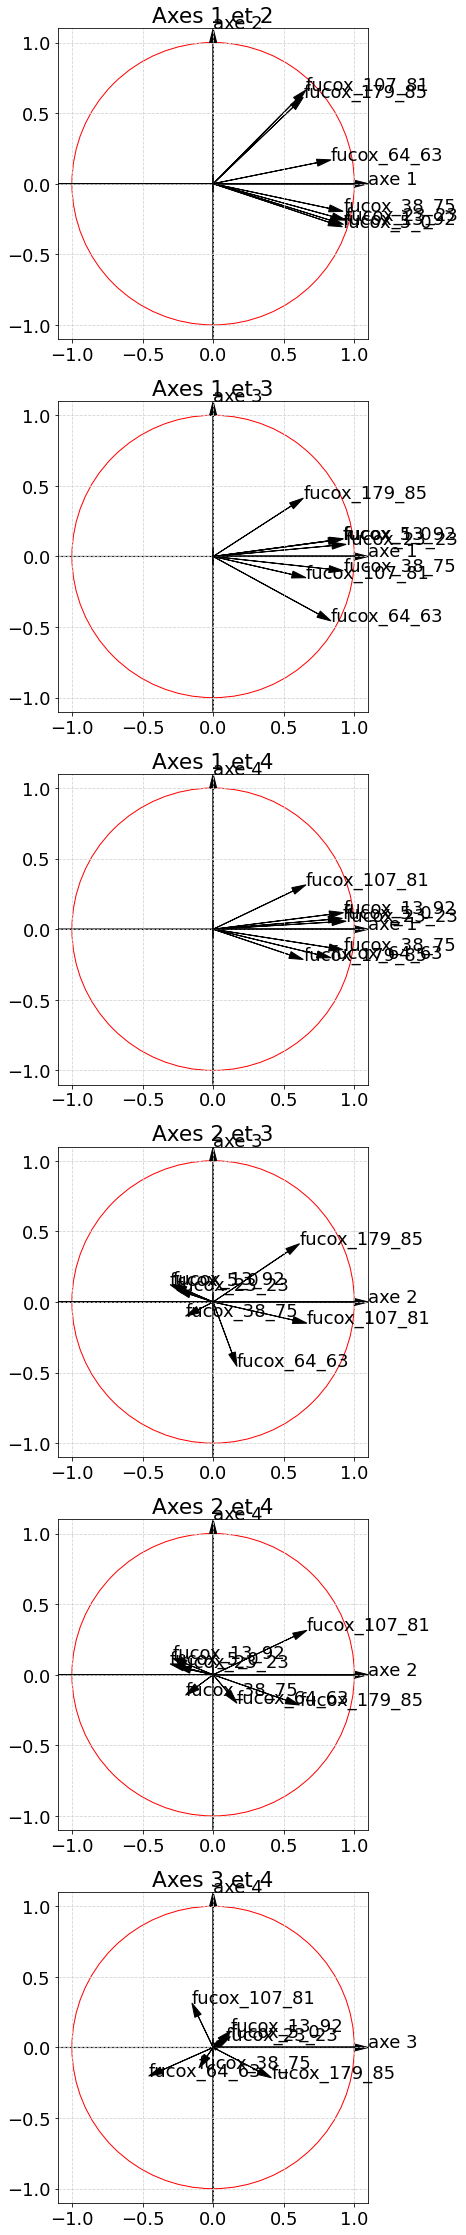

In [ ]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=4
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')

In [ ]:
data_fucox_cr.shape

(1614, 7)

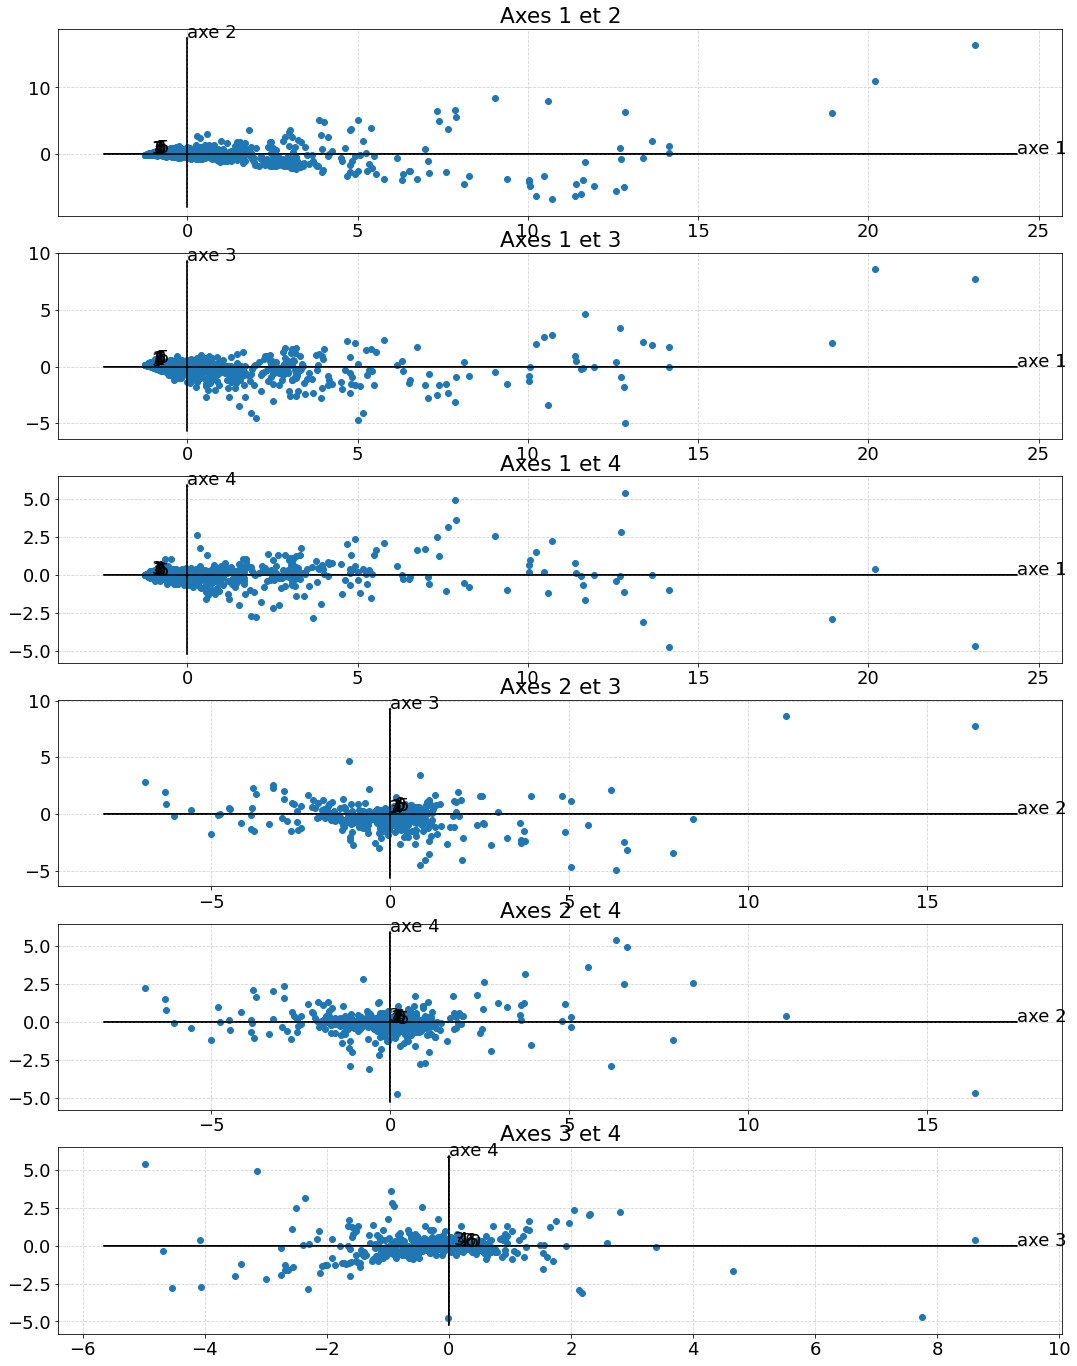

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        for k in range(data_fucox_cr.shape[1]):
            plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], k)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

### PCA on perid

In [ ]:
moyennes_perid = data_perid.mean(axis=0)

In [ ]:
moyennes_perid

perid_5_0       0.00535
perid_13_92     0.00569
perid_23_23     0.00625
perid_38_75     0.00687
perid_64_63     0.00609
perid_107_81    0.00296
perid_179_85    0.00101
dtype: float64

In [ ]:
ecartTypes_perid = data_perid.std(axis=0,ddof=1)

In [ ]:
data_perid

perid_5_0  perid_13_92  perid_23_23  perid_38_75  perid_64_63  \
0       0.00100      0.00037      0.00039      0.00100      0.00100   
1       0.00167      0.00145      0.00308      0.00883      0.00397   
2       0.00245      0.00145      0.00263      0.00523      0.00449   
3       0.00100      0.00075      0.00084      0.00100      0.00100   
4       0.00100      0.00093      0.00074      0.00100      0.00100   
...         ...          ...          ...          ...          ...   
1609    0.00100      0.00081      0.00111      0.00100      0.00100   
1610    0.01051      0.00792      0.00999      0.01358      0.00962   
1611    0.00815      0.00792      0.01005      0.01203      0.00939   
1612    0.00100      0.00037      0.00039      0.00100      0.00100   
1613    0.00100      0.00010      0.00108      0.00100      0.00100   

      perid_107_81  perid_179_85  
0          0.00267       0.00160  
1          0.00164       0.00000  
2          0.00337       0.00174  
3          0.00200       0.00033  
4          0.00200       0.00000  
...            ...           ...  
1609       0.00267       0.00120  
1610       0.00349       0.00000  
1611       0.00313       0.00096  
1612       0.00200       0.00080  
1613       0.00200       0.00067  

[1614 rows x 7 columns]

In [ ]:
data_perid_c = data_perid - moyennes_perid
data_perid_cr = data_perid_c / ecartTypes_perid
del(data_perid_c)
data_perid_cr.columns = [str(col) + '_cr' for col in data_perid_cr.columns]
data_perid_cr

perid_5_0_cr  perid_13_92_cr  perid_23_23_cr  perid_38_75_cr  \
0         -0.61407        -0.75274        -0.74748        -0.72625   
1         -0.51933        -0.60007        -0.40400         0.24278   
2         -0.40912        -0.60007        -0.46155        -0.20352   
3         -0.61407        -0.69842        -0.68931        -0.72625   
4         -0.61407        -0.67248        -0.70184        -0.72625   
...            ...             ...             ...             ...   
1609      -0.61407        -0.69039        -0.65505        -0.72625   
1610       0.72731         0.31457         0.47721         0.82986   
1611       0.39496         0.31457         0.48531         0.63843   
1612      -0.61407        -0.75274        -0.74748        -0.72625   
1613      -0.61407        -0.78972        -0.65851        -0.72625   

      perid_64_63_cr  perid_107_81_cr  perid_179_85_cr  
0           -0.74911         -0.07489          0.27721  
1           -0.31230         -0.33841         -0.46892  
2           -0.23535          0.10608          0.34103  
3           -0.74911         -0.24658         -0.31348  
4           -0.74911         -0.24658         -0.46892  
...              ...              ...              ...  
1609        -0.74911         -0.07489          0.09068  
1610         0.52123          0.13819         -0.46892  
1611         0.48682          0.04414         -0.02215  
1612        -0.74911         -0.24658         -0.09586  
1613        -0.74911         -0.24658         -0.15803  

[1614 rows x 7 columns]

In [ ]:
# np.isnan(data_perid_cr.loc[0,'perid_5_0_cr'])

In [ ]:
# data_perid_cr=data_perid_cr.where(np.isnan(data_perid_cr)==False,0)

In [ ]:
# data_perid_crNoNan

In [ ]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(data_perid_cr)
    lesNouvellesCoordonnees = acp.fit_transform(data_perid_cr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
0    -1.55506  0.39366  0.28277 -0.01342  0.10132 -0.08479 -0.05195
1    -0.79501 -0.41571 -0.37883  0.14835  0.49201 -0.22866  0.13842
2    -0.80151  0.49006 -0.04008  0.16029  0.18277 -0.13855 -0.04881
3    -1.57947 -0.14513  0.07394 -0.23327  0.09328 -0.04498 -0.03626
4    -1.58472 -0.25428  0.00962 -0.32375  0.08738 -0.05034 -0.01050
...       ...      ...      ...      ...      ...      ...      ...
1609 -1.49719  0.24184  0.22981 -0.12602  0.11784 -0.01364 -0.04915
1610  1.24732 -0.44485 -0.38328 -0.11304  0.14178 -0.33177 -0.10695
1611  1.01542 -0.14340 -0.20057  0.18436  0.09367 -0.04596 -0.02748
1612 -1.61552  0.02187  0.14820 -0.10451  0.08344 -0.09117 -0.04983
1613 -1.59524 -0.03070  0.12000 -0.13025  0.12938 -0.04352 -0.11414

[1614 rows x 7 columns]

In [ ]:
dfPCA=pd.concat([dfPCA,plesNouvellesCoordonnees[['CP_1','CP_2']]],axis=1)

In [ ]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(data_perid,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [79.02 47.72 35.69 26.87 18.43 15.4  14.02]
 * inerties des axes/facteurs (ordonnées) :
 [6244.6  2277.55 1273.69  721.94  339.51  237.23  196.48]
 * variance des axes/facteurs (ordonnées) :
 [3.87 1.41 0.79 0.45 0.21 0.15 0.12]
 * vecteurs propres :
    v_1  : [0.45 0.45 0.47 0.45 0.35 0.2  0.07]
    v_2  : [-0.12 -0.12 -0.16 -0.1   0.14  0.66  0.69]
    v_3  : [ 0.31  0.32  0.13 -0.2  -0.7  -0.21  0.46]
    v_4  : [-0.18 -0.19  0.02  0.31  0.3  -0.66  0.55]
    v_5  : [-0.28 -0.37  0.33  0.62 -0.5   0.21 -0.05]
    v_6  : [-0.6   0.24  0.65 -0.39  0.09 -0.01  0.02]
    v_7  : [-0.46  0.67 -0.46  0.34 -0.11  0.02 -0.02]


In [ ]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(data_perid_cr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(data_perid_cr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[3.87 1.41 0.79 0.45 0.21 0.15 0.12]  (facteurs)
[1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 7.000000000000003  (facteurs)
 - 6.999999999999991  (donnees)


In [ ]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[6244.6  2277.55 1273.69  721.94  339.51  237.23  196.48] (methode 1)
[6244.6  2277.55 1273.69  721.94  339.51  237.23  196.48] (methode 2)
inertie totale :
11291.000000000004 (methode 1)
11291.000000000004 (methode 2)
pourcentages d'inertie :
 [ 55.306  20.171  11.281   6.394   3.007   2.101   1.740]
pourcentages d'inertie (cumules) :
 [ 55.306  75.477  86.758  93.152  96.159  98.260  100.000]


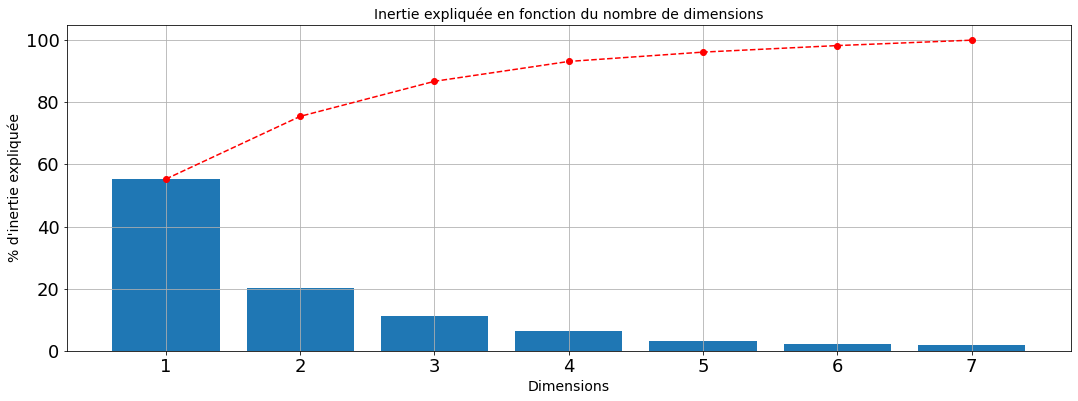

In [ ]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [ ]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1      CP_2      CP_3     CP_4      CP_5     CP_6     CP_7
0     90.45199   5.79663   2.99081  0.00674   0.38395  0.26892  0.10095
1     49.22834  13.45991  11.17798  1.71408  18.85475  4.07252  1.49242
2     66.58202  24.89017   0.16651  2.66289   3.46201  1.98953  0.24688
3     96.40673   0.81396   0.21129  2.10275   0.33628  0.07818  0.05081
4     93.31730   2.40259   0.00344  3.89466   0.28374  0.09417  0.00410
...        ...       ...       ...      ...       ...      ...      ...
1609  93.97691   2.45196   2.21412  0.66578   0.58213  0.00780  0.10130
1610  75.70875   9.62984   7.14861  0.62183   0.97819  5.35618  0.55660
1611  90.64427   1.80791   3.53642  2.98803   0.77127  0.18571  0.06640
1612  98.07898   0.01797   0.82533  0.41045   0.26161  0.31234  0.09332
1613  97.54798   0.03613   0.55199  0.65029   0.64165  0.07259  0.49937

[1614 rows x 7 columns]

In [ ]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100;

In [ ]:
nomDesVariables = list(data_perid)

In [ ]:
corrOldNew = np.corrcoef(data_perid_cr.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
perid_5_0     0.89019 -0.14422  0.27754 -0.12081 -0.12798 -0.22905 -0.16217
perid_13_92   0.88929 -0.14838  0.28158 -0.12515 -0.17000  0.09274  0.23385
perid_23_23   0.91669 -0.18742  0.11857  0.01137  0.15015  0.24992 -0.15924
perid_38_75   0.89108 -0.11869 -0.17674  0.21065  0.28310 -0.14875  0.11836
perid_64_63   0.69615  0.17205 -0.62453  0.20163 -0.22892  0.03642 -0.03677
perid_107_81  0.38637  0.78116 -0.18390 -0.44387  0.09788 -0.00437  0.00865
perid_179_85  0.14104  0.82472  0.40518  0.36762 -0.02306  0.00856 -0.00596

In [ ]:
PCACoordVars.reset_index(drop=True, inplace=True)
coordonneesDesVariables.reset_index(drop=True, inplace=True)
PCACoordVars=pd.concat([PCACoordVars,coordonneesDesVariables[['CP_1','CP_2']]],axis=1)

In [ ]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3      CP_4     CP_5     CP_6     CP_7
0  79.24393   2.07984   7.70270   1.45952  1.63792  5.24626  2.62983
1  79.08432   2.20164   7.92899   1.56628  2.89009  0.86009  5.46860
2  84.03215   3.51280   1.40588   0.01292  2.25444  6.24615  2.53567
3  79.40202   1.40869   3.12369   4.43746  8.01451  2.21274  1.40090
4  48.46250   2.96008  39.00398   4.06537  5.24023  0.13261  0.13523
5  14.92821  61.02065   3.38186  19.70178  0.95811  0.00191  0.00749
6   1.98915  68.01577  16.41682  13.51419  0.05317  0.00733  0.00356

In [ ]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5      CP_6      CP_7
0  20.46894   1.47298   9.75471   3.26095   7.78165  35.67165  21.58911
1  20.42771   1.55924  10.04128   3.49949  13.73064   5.84813  44.89351
2  21.70575   2.48783   1.78041   0.02886  10.71072  42.47031  20.81612
3  20.50978   0.99766   3.95584   9.91444  38.07642  15.04541  11.50046
4  12.51801   2.09638  49.39469   9.08310  24.89603   0.90165   1.11014
5   3.85600  43.21592   4.28279  44.01892   4.55192   0.01298   0.06147
6   0.51380  48.16999  20.79028  30.19424   0.25262   0.04987   0.02920

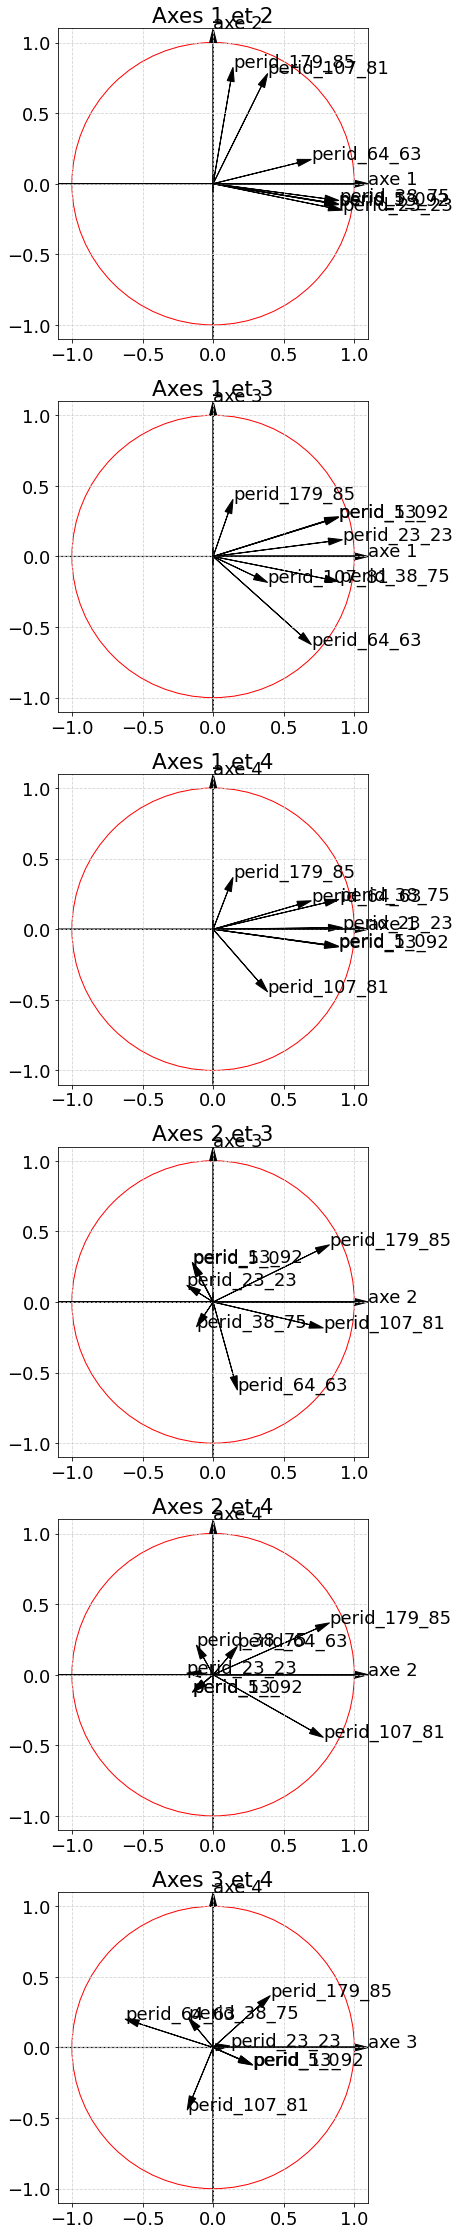

In [ ]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=4
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')

In [ ]:
data_perid_cr.shape

(1614, 7)

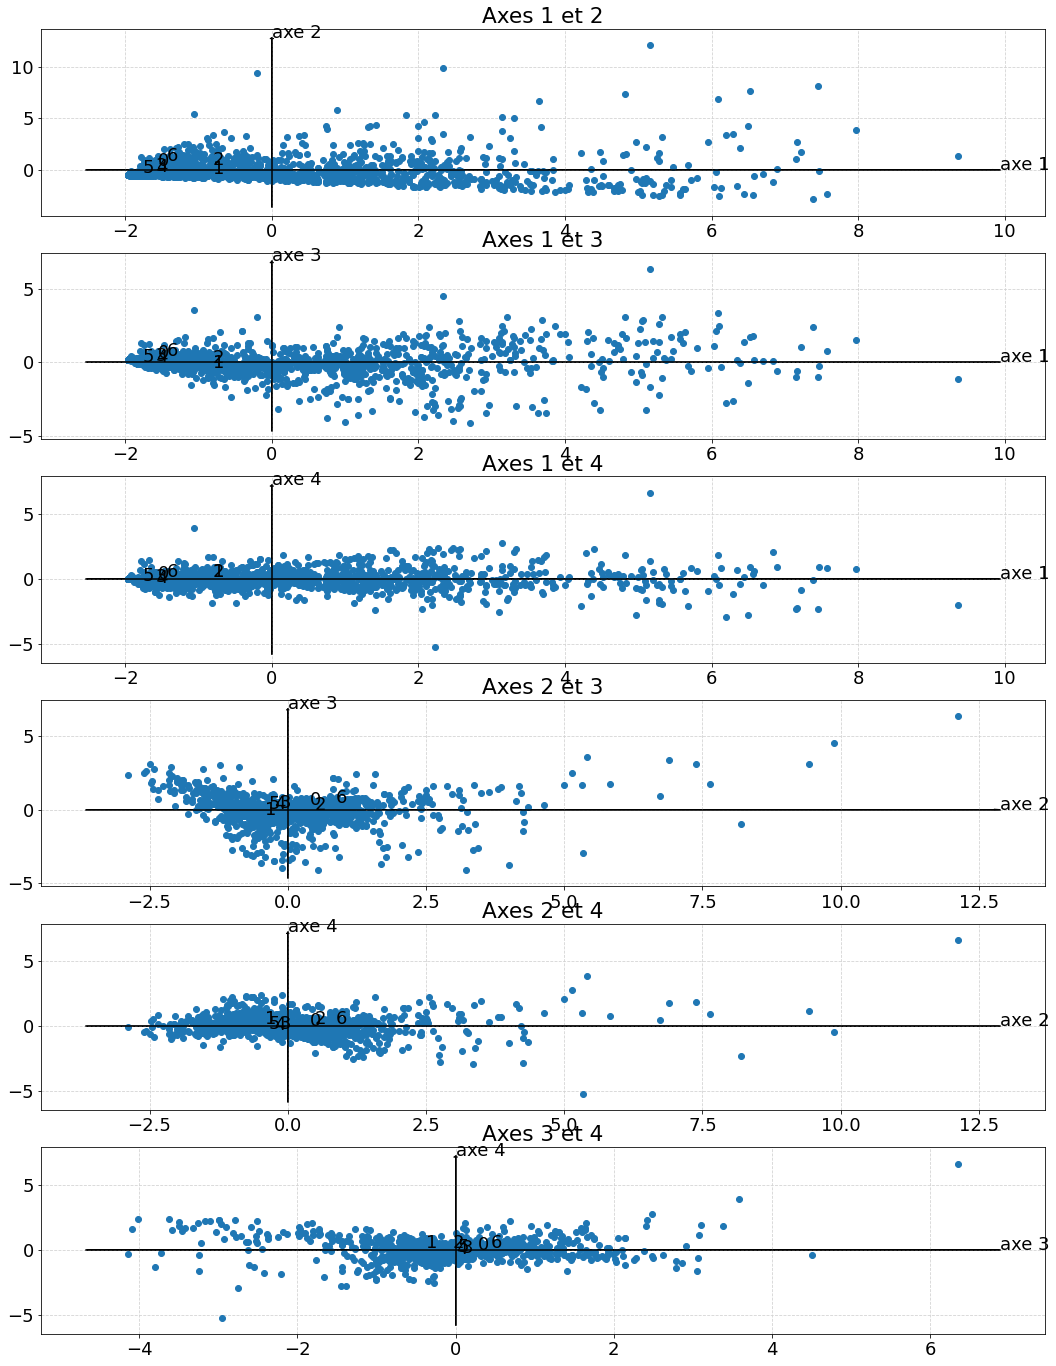

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        for k in range(data_perid_cr.shape[1]):
            plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], k)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

### PCA on zeax

In [ ]:
moyennes_zeax = data_zeax.mean(axis=0)

In [ ]:
moyennes_zeax

zeax_5_0       0.04493
zeax_13_92     0.04497
zeax_23_23     0.04403
zeax_38_75     0.04505
zeax_64_63     0.03918
zeax_107_81    0.02409
zeax_179_85    0.00820
dtype: float64

In [ ]:
ecartTypes_zeax = data_zeax.std(axis=0,ddof=1)

In [ ]:
data_zeax

zeax_5_0  zeax_13_92  zeax_23_23  zeax_38_75  zeax_64_63  zeax_107_81  \
0      0.06100     0.04182     0.05111     0.05800     0.06850      0.06633   
1      0.01653     0.02721     0.02072     0.02152     0.05140      0.03517   
2      0.01517     0.02721     0.01580     0.03113     0.05335      0.04337   
3      0.04400     0.05369     0.04475     0.04600     0.04700      0.03050   
4      0.05900     0.04671     0.04751     0.06100     0.06050      0.04633   
...        ...         ...         ...         ...         ...          ...   
1609   0.08200     0.07950     0.07232     0.07941     0.08139      0.08600   
1610   0.00866     0.03969     0.01457     0.05267     0.07715      0.02649   
1611   0.00765     0.03969     0.00754     0.03750     0.07270      0.02127   
1612   0.05900     0.04182     0.05111     0.06000     0.05700      0.06900   
1613   0.07000     0.07683     0.06733     0.08000     0.07700      0.07100   

      zeax_179_85  
0         0.01980  
1         0.00759  
2         0.00858  
3         0.00233  
4         0.00800  
...           ...  
1609      0.03680  
1610      0.01093  
1611      0.00486  
1612      0.02140  
1613      0.01367  

[1614 rows x 7 columns]

In [ ]:
data_zeax_c = data_zeax - moyennes_zeax
data_zeax_cr = data_zeax_c / ecartTypes_zeax
del(data_zeax_c)
data_zeax_cr.columns = [str(col) + '_cr' for col in data_zeax_cr.columns]
data_zeax_cr

zeax_5_0_cr  zeax_13_92_cr  zeax_23_23_cr  zeax_38_75_cr  zeax_64_63_cr  \
0         0.65970       -0.13499        0.29506        0.52743        1.21248   
1        -1.16602       -0.76293       -0.97091       -0.95816        0.50542   
2        -1.22187       -0.76293       -1.17604       -0.56682        0.58624   
3        -0.03826        0.37484        0.02989        0.03871        0.32350   
4         0.57759        0.07469        0.14487        0.64961        0.88169   
...           ...            ...            ...            ...            ...   
1609      1.52188        1.48362        1.17847        1.39946        1.74544   
1610     -1.48905       -0.22648       -1.22714        0.31031        1.57028   
1611     -1.53060       -0.22648       -1.52015       -0.30747        1.38626   
1612      0.57759       -0.13499        0.29506        0.60888        0.73698   
1613      1.02920        1.36901        0.97078        1.42342        1.56393   

      zeax_107_81_cr  zeax_179_85_cr  
0            1.85489         0.96345  
1            0.48648        -0.05066  
2            0.84659         0.03170  
3            0.28131        -0.48691  
4            0.97661        -0.01638  
...              ...             ...  
1609         2.71853         2.37506  
1610         0.10527         0.22710  
1611        -0.12416        -0.27748  
1612         1.97200         1.09631  
1613         2.05982         0.45416  

[1614 rows x 7 columns]

In [ ]:
# np.isnan(data_zeax_cr.loc[0,'zeax_5_0_cr'])

In [ ]:
# data_zeax_cr=data_zeax_cr.where(np.isnan(data_zeax_cr)==False,0)

In [ ]:
# data_zeax_crNoNan

In [ ]:
acp = PCA()
etude_centreeReduite = True
if etude_centreeReduite:
    CP = acp.fit(data_zeax_cr)
    lesNouvellesCoordonnees = acp.fit_transform(data_zeax_cr)
else:
    CP = acp.fit(X)
    lesNouvellesCoordonnees = acp.fit_transform(X)
# mise en forme
plesNouvellesCoordonnees = pd.DataFrame(data=lesNouvellesCoordonnees, columns=list(range(1,acp.n_features_+1)))
plesNouvellesCoordonnees.columns = ['CP_' + str(col) for col in plesNouvellesCoordonnees.columns]
plesNouvellesCoordonnees

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
0     1.68363  1.79455 -0.60101  0.17266  0.35015  0.29611 -0.03607
1    -1.34624  1.01021 -1.02213 -0.05158 -0.58866  0.18920 -0.18557
2    -1.14988  1.31269 -1.23428 -0.07979 -0.49322 -0.02403  0.14744
3     0.32317 -0.21166 -0.51363  0.25071 -0.29164 -0.04805  0.04431
4     1.24988  0.52067 -0.72854  0.04084  0.25919  0.18411  0.21628
...       ...      ...      ...      ...      ...      ...      ...
1609  4.10554  2.57043  0.38727  0.51811 -0.13311  0.03064  0.20677
1610 -0.44882  1.04496 -1.29534 -1.26362 -1.23042 -0.21083  0.52227
1611 -1.06063  0.64128 -1.45500 -0.94020 -1.42581  0.11025  0.48092
1612  1.53552  1.87663 -0.34996  0.38007  0.54148 -0.00413  0.06071
1613  3.30686  0.97279 -0.70167  0.51307 -0.15942 -0.24296  0.27442

[1614 rows x 7 columns]

In [ ]:
dfPCA=pd.concat([dfPCA,plesNouvellesCoordonnees[['CP_1','CP_2']]],axis=1)

In [ ]:
np.set_printoptions(precision=2)
print(" * valeurs propres des axes/facteurs (ordonnées) :\n",acp.singular_values_)
print(" * inerties des axes/facteurs (ordonnées) :\n",acp.singular_values_**2)
print(" * variance des axes/facteurs (ordonnées) :\n",acp.singular_values_**2/(np.size(data_zeax,axis=0)-1))
print(" * vecteurs propres :")
for i in range(len(acp.components_)):
    print("    v_{:<2d} :".format(i+1),acp.components_.T[:,i])
np.set_printoptions(precision=4)

 * valeurs propres des axes/facteurs (ordonnées) :
 [84.57 49.27 27.56 19.7  15.03 14.12 11.75]
 * inerties des axes/facteurs (ordonnées) :
 [7152.34 2427.71  759.63  388.21  225.85  199.26  138.  ]
 * variance des axes/facteurs (ordonnées) :
 [4.43 1.51 0.47 0.24 0.14 0.12 0.09]
 * vecteurs propres :
    v_1  : [0.43 0.42 0.44 0.44 0.41 0.26 0.11]
    v_2  : [-0.18 -0.25 -0.2  -0.08  0.18  0.59  0.69]
    v_3  : [ 0.22  0.24  0.17 -0.08 -0.5  -0.41  0.66]
    v_4  : [ 0.2   0.37  0.02 -0.44 -0.46  0.6  -0.24]
    v_5  : [ 0.44 -0.68  0.17  0.34 -0.4   0.17 -0.09]
    v_6  : [ 0.68 -0.16 -0.26 -0.51  0.39 -0.17  0.02]
    v_7  : [ 0.21  0.26 -0.8   0.47 -0.15  0.02 -0.  ]


In [ ]:
#np.diag(np.cov(Xcr.T))
np.set_printoptions(precision=2)
print("variances :")
print(acp.explained_variance_," (facteurs)")
if etude_centreeReduite:
    print(np.diag(np.cov(data_zeax_cr.T,ddof=1))," (donnees)")
else:
    print(np.diag(np.cov(X.T,ddof=1))," (donnees)")

print("variance totale :")
print(" -",sum(acp.explained_variance_)," (facteurs)")
if etude_centreeReduite:
    print(" -",np.sum(np.diag(np.cov(data_zeax_cr.T,ddof=1)))," (donnees)")
else:
    print(" -",np.sum(np.diag(np.cov(X.T,ddof=1)))," (donnees)")
np.set_printoptions(precision=4)

variances :
[4.43 1.51 0.47 0.24 0.14 0.12 0.09]  (facteurs)
[1. 1. 1. 1. 1. 1. 1.]  (donnees)
variance totale :
 - 7.000000000000012  (facteurs)
 - 7.000000000000012  (donnees)


In [ ]:
np.set_printoptions(precision=2)
print("inerties :")
print(acp.explained_variance_*(acp.n_samples_-1),"(methode 1)")
print(acp.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(acp.explained_variance_*(acp.n_samples_-1)),"(methode 1)")
print(np.sum(acp.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",acp.explained_variance_ratio_*100)
    print("pourcentages d'inertie (cumules) :\n",np.cumsum(acp.explained_variance_ratio_)*100)

inerties :
[7152.34 2427.71  759.63  388.21  225.85  199.26  138.  ] (methode 1)
[7152.34 2427.71  759.63  388.21  225.85  199.26  138.  ] (methode 2)
inertie totale :
11291.000000000022 (methode 1)
11291.000000000022 (methode 2)
pourcentages d'inertie :
 [ 63.345  21.501   6.728   3.438   2.000   1.765   1.222]
pourcentages d'inertie (cumules) :
 [ 63.345  84.847  91.574  95.013  97.013  98.778  100.000]


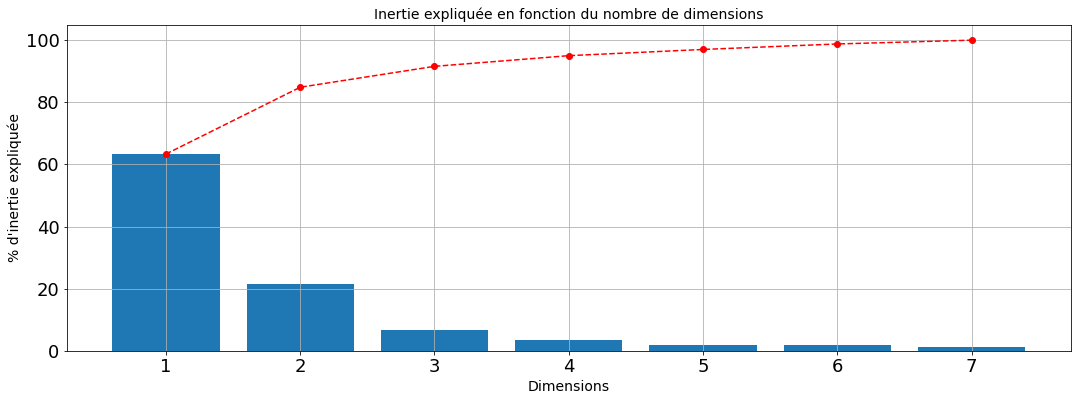

In [ ]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+1,acp.explained_variance_ratio_*100)
plt.plot(np.arange(len(acp.explained_variance_ratio_))+1,np.cumsum(acp.explained_variance_ratio_*100),'r--o')
plt.xlabel("Dimensions",fontsize=14)
plt.ylabel("% d'inertie expliquée",fontsize=14)
plt.title("Inertie expliquée en fonction du nombre de dimensions",fontsize=14);
plt.grid(True)

In [ ]:
qual = lesNouvellesCoordonnees*lesNouvellesCoordonnees
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,acp.n_features_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

CP_1      CP_2      CP_3      CP_4      CP_5     CP_6     CP_7
0     42.57697  48.37154   5.42563   0.44778   1.84157  1.31697  0.01954
1     42.17686  23.74945  24.31313   0.06191   8.06419  0.83304  0.80143
2     27.31413  35.59698  31.47097   0.13151   5.02542  0.01193  0.44905
3     18.47708   7.92561  46.67375  11.12011  15.04767  0.40841  0.34737
4     62.15054  10.78506  21.11586   0.06636   2.67261  1.34860  1.86098
...        ...       ...       ...       ...       ...      ...      ...
1609  70.40004  27.59586   0.62641   1.12119   0.07401  0.00392  0.17857
1610   3.14786  17.06388  26.22063  24.95211  23.65845  0.69460  4.26247
1611  16.51037   6.03564  31.07090  12.97387  29.83639  0.17840  3.39443
1612  36.59279  54.65669   1.90069   2.24192   4.55045  0.00026  0.05720
1613  85.45238   7.39489   3.84730   2.05708   0.19861  0.46128  0.58846

[1614 rows x 7 columns]

In [ ]:
contr = lesNouvellesCoordonnees*lesNouvellesCoordonnees
contr = contr / contr.sum(axis=0)
contribution = pd.DataFrame(data=contr, columns=list(range(1,acp.n_features_+1)))
del contr
contribution.columns = ['CP_' + str(col) for col in contribution.columns]
contribution*100;

In [ ]:
nomDesVariables = list(data_zeax)

In [ ]:
corrOldNew = np.corrcoef(data_zeax_cr.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(nomDesVariables):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,acp.n_features_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

CP_1     CP_2     CP_3     CP_4     CP_5     CP_6     CP_7
zeax_5_0     0.91292 -0.21594  0.15341  0.09703  0.16280  0.23850  0.06011
zeax_13_92   0.87563 -0.31132  0.16790  0.18298 -0.25579 -0.05716  0.07738
zeax_23_23   0.92693 -0.24410  0.11790  0.01134  0.06312 -0.09215 -0.23389
zeax_38_75   0.93503 -0.09745 -0.05448 -0.21386  0.12657 -0.17974  0.13852
zeax_64_63   0.85936  0.22384 -0.34042 -0.22794 -0.15074  0.13717 -0.04495
zeax_107_81  0.55663  0.71881 -0.28179  0.29351  0.06455 -0.06090  0.00643
zeax_179_85  0.22851  0.85186  0.45503 -0.11752 -0.03451  0.00794 -0.00128

In [ ]:
PCACoordVars.reset_index(drop=True, inplace=True)
coordonneesDesVariables.reset_index(drop=True, inplace=True)
PCACoordVars=pd.concat([PCACoordVars,coordonneesDesVariables[['CP_1','CP_2']]],axis=1)

In [ ]:
qualVar = coordonneesDesVariables**2
qualVar*100

CP_1      CP_2      CP_3     CP_4     CP_5     CP_6     CP_7
0  83.34213   4.66294   2.35350  0.94144  2.65044  5.68823  0.36132
1  76.67221   9.69218   2.81892  3.34824  6.54303  0.32673  0.59869
2  85.92050   5.95863   1.39012  0.01287  0.39836  0.84909  5.47043
3  87.42867   0.94970   0.29680  4.57343  1.60206  3.23071  1.91864
4  73.84965   5.01043  11.58830  5.19549  2.27240  1.88163  0.20209
5  30.98368  51.66872   7.94082  8.61511  0.41666  0.37088  0.00414
6   5.22157  72.56610  20.70561  1.38119  0.11906  0.00631  0.00016

In [ ]:
contrVar=(coordonneesDesVariables**2)/(coordonneesDesVariables**2).sum(axis=0)
contrVar*100

CP_1      CP_2      CP_3      CP_4      CP_5      CP_6      CP_7
0  18.79537   3.09812   4.99745   3.91161  18.92902  46.04521   4.22323
1  17.29117   6.43961   5.98573  13.91173  46.72921   2.64480   6.99775
2  19.37685   3.95900   2.95180   0.05346   2.84499   6.87321  63.94069
3  19.71697   0.63099   0.63022  19.00230  11.44162  26.15198  22.42592
4  16.65462   3.32900  24.60670  21.58693  16.22911  15.23149   2.36214
5   6.98746  34.32939  16.86161  35.79523   2.97573   3.00222   0.04836
6   1.17757  48.21389  43.96649   5.73874   0.85032   0.05109   0.00190

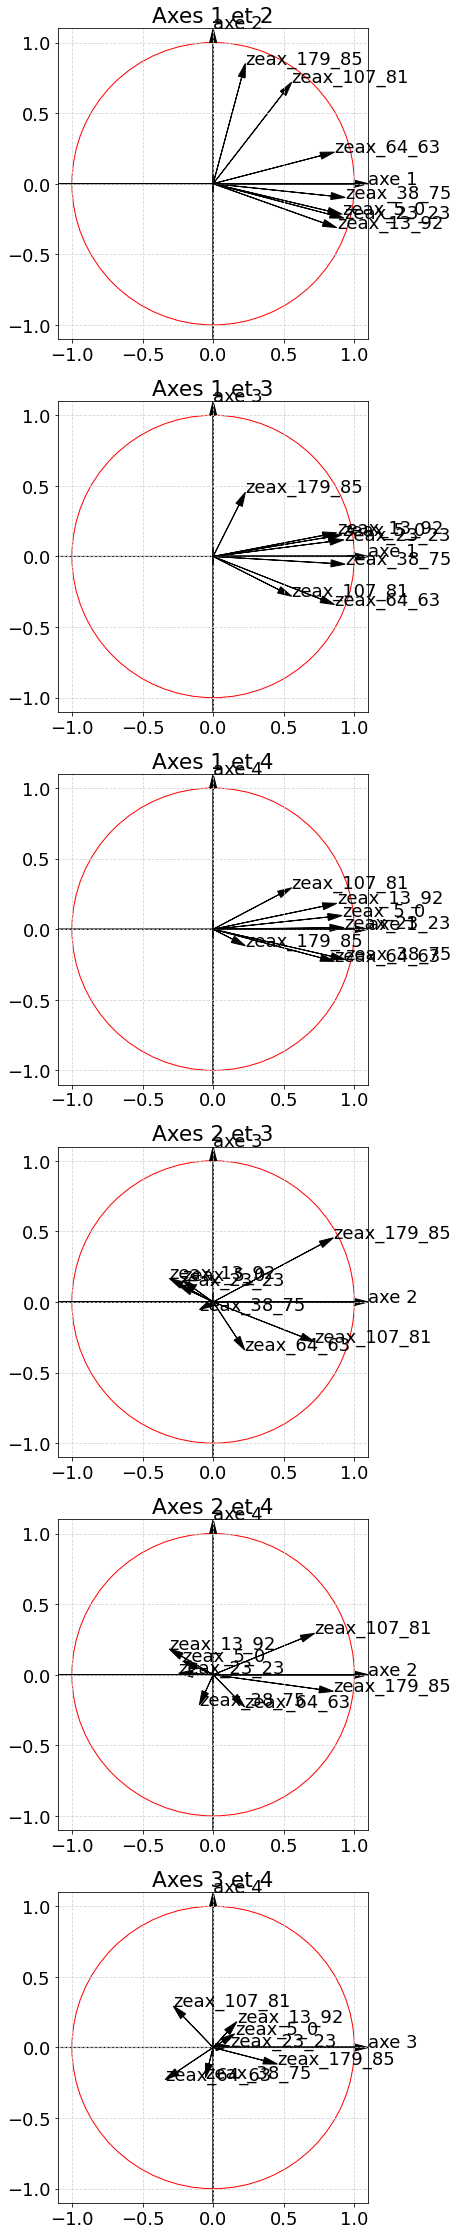

In [ ]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=4
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')

In [ ]:
data_zeax_cr.shape

(1614, 7)

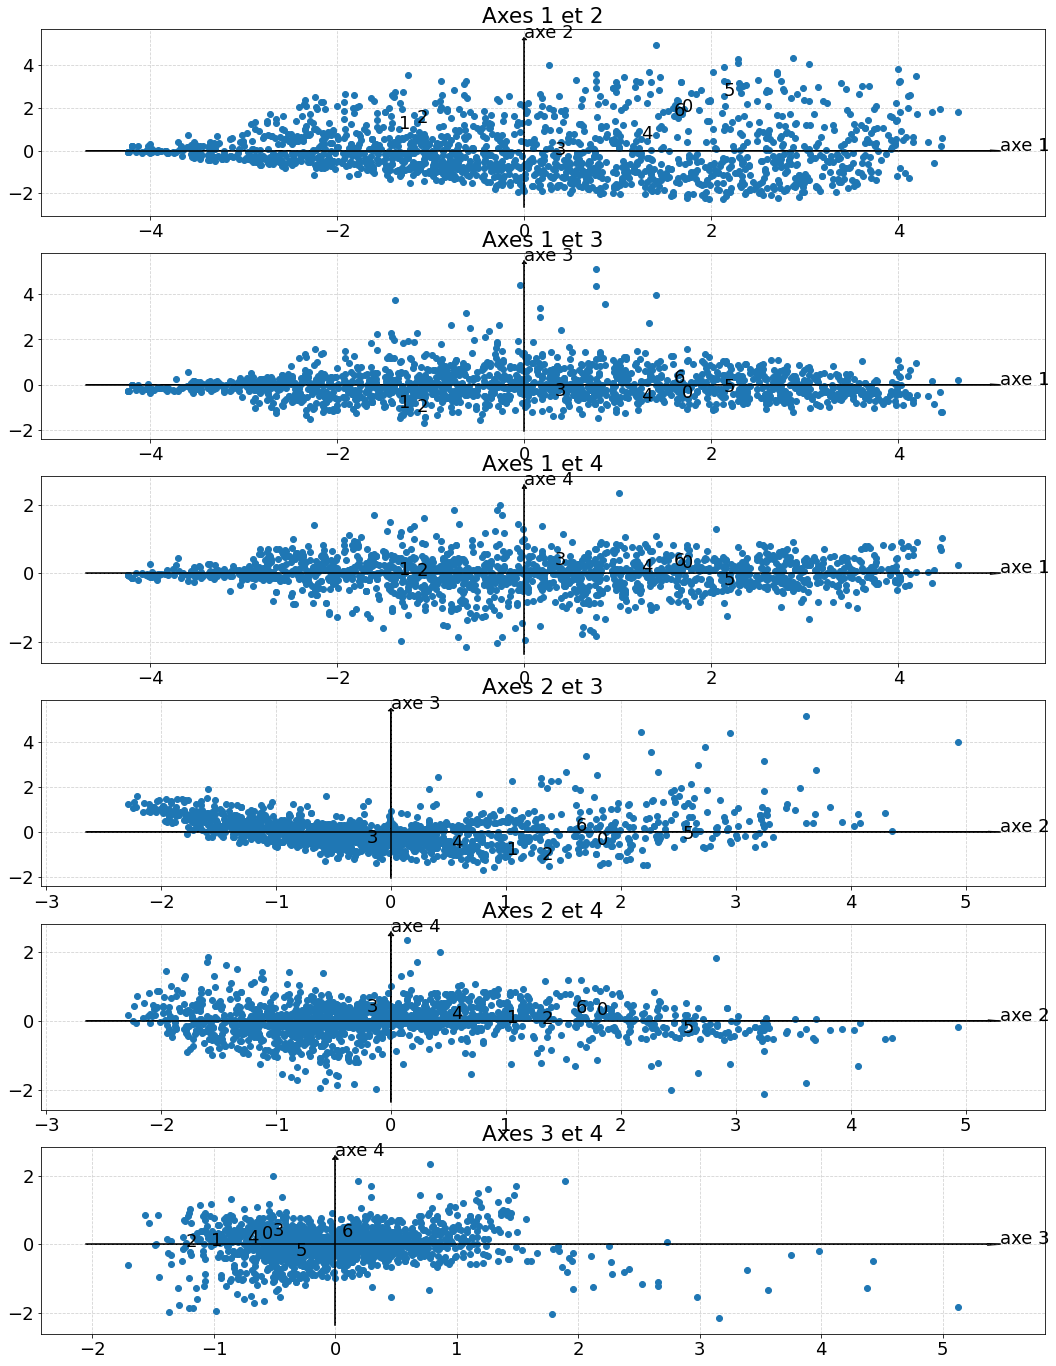

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        plt.plot(lesNouvellesCoordonnees[:,i],lesNouvellesCoordonnees[:,j],'o')
        plt.title('Axes {} et {}'.format(i+1,j+1))
        for k in range(data_zeax_cr.shape[1]):
            plt.text(lesNouvellesCoordonnees[k,i], lesNouvellesCoordonnees[k,j], k)#,fontsize=fontsize)
        # Ajouter les axes
        plt.grid(color='lightgray',linestyle='--')
        x_lim = plt.xlim()
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        y_lim = plt.ylim()
        ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))

# Résultats PCA

In [ ]:
dfPCA

CP_1     CP_2     CP_1     CP_2     CP_1     CP_2     CP_1     CP_2  \
0    -1.60876  1.97765  0.88474  3.04031 -2.12379 -0.15960 -0.96381  0.14567   
1    -1.51336 -0.16029 -1.11658  0.55346 -1.37901  1.32615 -0.96731  0.04573   
2    -1.58050 -0.23627 -1.17709  0.50891 -1.63944  1.33216 -1.02094  0.02610   
3    -1.50431  0.29299  0.50989  0.65781 -1.94734 -0.02481 -1.03531 -0.03531   
4    -1.40465  1.43732  1.15390  1.91274 -2.15730  0.16418 -0.99321  0.02047   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1609 -1.30635  2.62930  2.45908  1.81441 -2.03342  0.69569 -1.04873 -0.01876   
1610 -0.88634 -0.14207 -0.43795  0.84566 -0.27707  1.04091 -0.75560 -0.07287   
1611 -0.86557 -0.47610 -0.63792  0.37118 -0.16013  0.43555 -0.76858 -0.11107   
1612 -1.52798  2.15789  1.04445  2.59776 -2.01998 -0.22426 -1.01068 -0.00162   
1613 -1.36541  0.99809  1.45811  0.94625 -2.09029  0.24852 -0.88433  0.13847   

         CP_1     CP_2     CP_1     CP_2  
0    -1.55506  0.39366  1.68363  1.79455  
1    -0.79501 -0.41571 -1.34624  1.01021  
2    -0.80151  0.49006 -1.14988  1.31269  
3    -1.57947 -0.14513  0.32317 -0.21166  
4    -1.58472 -0.25428  1.24988  0.52067  
...       ...      ...      ...      ...  
1609 -1.49719  0.24184  4.10554  2.57043  
1610  1.24732 -0.44485 -0.44882  1.04496  
1611  1.01542 -0.14340 -1.06063  0.64128  
1612 -1.61552  0.02187  1.53552  1.87663  
1613 -1.59524 -0.03070  3.30686  0.97279  

[1614 rows x 12 columns]

In [ ]:
save('/content/drive/MyDrive/projet_long/dfPCA.npy',dfPCA,allow_pickle=True)
save('/content/drive/MyDrive/projet_long/PCACoordVars.npy',PCACoordVars,allow_pickle=True)
dfPCA.to_csv('dfPCA.csv')
!cp dfPCA.csv "drive/MyDrive/projet_long"
PCACoordVars.to_csv('PCACoordVars.csv')
!cp PCACoordVars.csv "drive/MyDrive/projet_long"

# Projection des données MED sur l'ACP

In [ ]:
PCACoordVars

CP_1     CP_2     CP_1     CP_2     CP_1     CP_2     CP_1     CP_2  \
0  0.92981  0.07752  0.95184 -0.11454  0.92852 -0.02253  0.91580 -0.30498   
1  0.93976  0.04875  0.93759 -0.15676  0.93171  0.02515  0.92359 -0.28820   
2  0.95789  0.03231  0.93601 -0.25062  0.95729  0.00991  0.94172 -0.25831   
3  0.90721 -0.03888  0.94920 -0.18599  0.92313 -0.02294  0.92074 -0.19554   
4  0.67193  0.05539  0.88781  0.04031  0.74423  0.19934  0.83477  0.16885   
5 -0.00403  0.87500  0.57529  0.72295  0.12631  0.88794  0.65754  0.66427   
6 -0.17367  0.84793  0.24027  0.89666 -0.34365  0.73137  0.63876  0.61219   

      CP_1     CP_2     CP_1     CP_2  
0  0.89019 -0.14422  0.91292 -0.21594  
1  0.88929 -0.14838  0.87563 -0.31132  
2  0.91669 -0.18742  0.92693 -0.24410  
3  0.89108 -0.11869  0.93503 -0.09745  
4  0.69615  0.17205  0.85936  0.22384  
5  0.38637  0.78116  0.55663  0.71881  
6  0.14104  0.82472  0.22851  0.85186

In [ ]:
fichier="/content/drive/MyDrive/projet_long/completed_med.csv"
df = pd.read_csv(fichier,sep=";")
df.head()

total_chla_5_0  total_chla_13_92  total_chla_23_23  total_chla_38_75  \
0         0.30900           0.48300           0.87500           1.15500   
1         0.15600           0.15700           0.06500           0.26750   
2         0.09472           0.08489           0.08560           0.24183   
3         0.09657           0.08721           0.13969           0.21097   
4         0.32600           0.34200           0.33600           0.32200   

   total_chla_64_63  total_chla_107_81  total_chla_179_85  DVchla_5_0  \
0           0.71800            0.75700            0.04700     0.00000   
1           0.41500            0.21900            0.02550     0.00000   
2           0.29462            0.02910            0.00864     0.00648   
3           0.30578            0.02291            0.00622     0.01217   
4           0.09450            0.05150            0.14167     0.00000   

   DVchla_13_92  DVchla_23_23  ...  perid_64_63  perid_107_81  perid_179_85  \
0       0.00000       0.00000  ...      0.02400        0.0180           0.0   
1       0.00000       0.00000  ...      0.02550        0.0040           0.0   
2       0.00687       0.00704  ...      0.00189        0.0000           0.0   
3       0.00198       0.01680  ...      0.00281        0.0000           0.0   
4       0.00000       0.00000  ...      0.00150        0.0005           0.0   

   zeax_5_0  zeax_13_92  zeax_23_23  zeax_38_75  zeax_64_63  zeax_107_81  \
0   0.00300     0.00500     0.01100     0.01050     0.00700      0.01067   
1   0.03900     0.04900     0.02000     0.04750     0.02000      0.00367   
2   0.04304     0.03730     0.03877     0.05342     0.01934      0.00000   
3   0.04974     0.04051     0.05318     0.04783     0.02308      0.00000   
4   0.01917     0.01955     0.02576     0.01042     0.00550      0.00335   

   zeax_179_85  
0      0.00000  
1      0.00050  
2      0.00000  
3      0.00000  
4      0.00353  

[5 rows x 42 columns]

In [ ]:
dfN=df

In [ ]:
dfN.iloc[0,0]

0.309

In [ ]:
dfN.iloc[0,0]

0.309

In [ ]:
#normalisation:
for i in range(df.shape[0]):
  dfN.iloc[i,0]=(df.iloc[i,0]-moyennes_total_chla[0])/ecartTypes_total_chla[0]
  dfN.iloc[i,1]=(df.iloc[i,1]-moyennes_total_chla[1])/ecartTypes_total_chla[1]
  dfN.iloc[i,2]=(df.iloc[i,2]-moyennes_total_chla[2])/ecartTypes_total_chla[2]
  dfN.iloc[i,3]=(df.iloc[i,3]-moyennes_total_chla[3])/ecartTypes_total_chla[3]
  dfN.iloc[i,4]=(df.iloc[i,4]-moyennes_total_chla[4])/ecartTypes_total_chla[4]
  dfN.iloc[i,5]=(df.iloc[i,5]-moyennes_total_chla[5])/ecartTypes_total_chla[5]
  dfN.iloc[i,6]=(df.iloc[i,6]-moyennes_total_chla[6])/ecartTypes_total_chla[6]

  dfN.iloc[i,7]=(df.iloc[i,7]-moyennes_DVchla[0])/ecartTypes_DVchla[0]
  dfN.iloc[i,8]=(df.iloc[i,8]-moyennes_DVchla[1])/ecartTypes_DVchla[1]
  dfN.iloc[i,9]=(df.iloc[i,9]-moyennes_DVchla[2])/ecartTypes_DVchla[2]
  dfN.iloc[i,10]=(df.iloc[i,10]-moyennes_DVchla[3])/ecartTypes_DVchla[3]
  dfN.iloc[i,11]=(df.iloc[i,11]-moyennes_DVchla[4])/ecartTypes_DVchla[4]
  dfN.iloc[i,12]=(df.iloc[i,12]-moyennes_DVchla[5])/ecartTypes_DVchla[5]
  dfN.iloc[i,13]=(df.iloc[i,13]-moyennes_DVchla[6])/ecartTypes_DVchla[6]

  dfN.iloc[i,14]=(df.iloc[i,14]-moyennes_X19hex[0])/ecartTypes_X19hex[0]
  dfN.iloc[i,15]=(df.iloc[i,15]-moyennes_X19hex[1])/ecartTypes_X19hex[1]
  dfN.iloc[i,16]=(df.iloc[i,16]-moyennes_X19hex[2])/ecartTypes_X19hex[2]
  dfN.iloc[i,17]=(df.iloc[i,17]-moyennes_X19hex[3])/ecartTypes_X19hex[3]
  dfN.iloc[i,18]=(df.iloc[i,18]-moyennes_X19hex[4])/ecartTypes_X19hex[4]
  dfN.iloc[i,19]=(df.iloc[i,19]-moyennes_X19hex[5])/ecartTypes_X19hex[5]
  dfN.iloc[i,20]=(df.iloc[i,20]-moyennes_X19hex[6])/ecartTypes_X19hex[6]

  dfN.iloc[i,21]=(df.iloc[i,21]-moyennes_fucox[0])/ecartTypes_fucox[0]
  dfN.iloc[i,22]=(df.iloc[i,22]-moyennes_fucox[1])/ecartTypes_fucox[1]
  dfN.iloc[i,23]=(df.iloc[i,23]-moyennes_fucox[2])/ecartTypes_fucox[2]
  dfN.iloc[i,24]=(df.iloc[i,24]-moyennes_fucox[3])/ecartTypes_fucox[3]
  dfN.iloc[i,26]=(df.iloc[i,26]-moyennes_fucox[5])/ecartTypes_fucox[5]
  dfN.iloc[i,27]=(df.iloc[i,27]-moyennes_fucox[6])/ecartTypes_fucox[6]

  dfN.iloc[i,28]=(df.iloc[i,28]-moyennes_perid[0])/ecartTypes_perid[0]
  dfN.iloc[i,29]=(df.iloc[i,29]-moyennes_perid[1])/ecartTypes_perid[1]
  dfN.iloc[i,30]=(df.iloc[i,30]-moyennes_perid[2])/ecartTypes_perid[2]
  dfN.iloc[i,31]=(df.iloc[i,31]-moyennes_perid[3])/ecartTypes_perid[3]
  dfN.iloc[i,32]=(df.iloc[i,32]-moyennes_perid[4])/ecartTypes_perid[4]
  dfN.iloc[i,33]=(df.iloc[i,33]-moyennes_perid[5])/ecartTypes_perid[5]
  dfN.iloc[i,34]=(df.iloc[i,34]-moyennes_perid[6])/ecartTypes_perid[6]

  dfN.iloc[i,35]=(df.iloc[i,35]-moyennes_zeax[0])/ecartTypes_zeax[0]
  dfN.iloc[i,36]=(df.iloc[i,36]-moyennes_zeax[1])/ecartTypes_zeax[1]
  dfN.iloc[i,37]=(df.iloc[i,37]-moyennes_zeax[2])/ecartTypes_zeax[2]
  dfN.iloc[i,38]=(df.iloc[i,38]-moyennes_zeax[3])/ecartTypes_zeax[3]
  dfN.iloc[i,39]=(df.iloc[i,39]-moyennes_zeax[4])/ecartTypes_zeax[4]
  dfN.iloc[i,40]=(df.iloc[i,40]-moyennes_zeax[5])/ecartTypes_zeax[5]
  dfN.iloc[i,41]=(df.iloc[i,41]-moyennes_zeax[6])/ecartTypes_zeax[6]

In [ ]:
dfN

total_chla_5_0  total_chla_13_92  total_chla_23_23  total_chla_38_75  \
0           0.10411           0.67366           1.84305           2.78680   
1          -0.38684          -0.40296          -0.71740          -0.14540   
2          -0.58348          -0.64111          -0.65229          -0.23022   
3          -0.57753          -0.63345          -0.48129          -0.33216   
4           0.15866           0.20800           0.13925           0.03466   
5           0.24530           0.30708           0.01280          -0.31555   
6          -0.49102          -0.71670          -0.73004          -0.78801   
7          -0.73661          -0.65065          -0.38549           0.04788   
8          -0.62109          -0.43929          -0.28117           0.24941   
9          -0.69008          -0.66221          -0.44713           0.25107   
10         -0.64355          -0.66386          -0.63205          -0.53691   
11          2.58453           1.87907           1.20768          -0.33538   
12         -0.30383          -0.52846          -0.52457          -0.19992   
13         -0.71735          -0.68037           0.15505           0.70205   
14         -0.47188          -0.37324          -0.28433          -0.25939   
15          0.46991           0.59770           0.37316           0.27254   
16          0.58864           1.06666           1.20452           1.00600   
17         -0.50236          -0.53506          -0.36968           0.46417   
18         -0.28416          -0.27086          -0.23376          -0.36181   
19          4.03172           3.91342           4.95985           3.71189   
20          1.43577           2.71791           2.26980           2.75376   
21         -0.32909          -0.13546          -0.07887           0.59632   
22         -0.43498          -0.45910          -0.39813           0.65910   
23         -0.45744          -0.40626           0.71456           1.56436   
24         -0.49102          -0.84220          -0.75849          -0.76818   
25          0.46029           0.49202           0.33839           0.23289   
26         -0.30112          -0.17179          -0.15157          -0.55013   
27         -0.63392          -0.63084          -0.29002           0.21968   
28          0.12657           0.04618          -0.08519          -0.01159   
29         -0.59679          -0.59451          -0.55935          -0.72051   
30          2.88616           4.14790           2.14019           1.83859   
31         -0.75265          -0.80587          -0.70792          -0.43449   
32         -0.50236          -0.69028          -0.49296          -0.19000   
33         -0.36438          -0.32370           0.06338           0.32540   
34         -0.47188          -0.44259          -0.40129          -0.42788   
35         -0.64997          -0.50204           0.05706           0.37496   
36         -0.22640          -0.25435          -0.20847          -0.29903   
37         -0.19431          -0.30719          -0.29066          -0.32216   
38          0.56297           0.47881           0.30046           0.02805   
39          0.82930           1.38700           1.19188           0.09083   
40         -0.69810          -0.68863          -0.63679          -0.58482   
41         -0.46706          -0.49213          -0.33807          -0.11732   
42          0.59602           0.61091           0.31943           0.90358   
43         -0.21357          -0.24774          -0.55618          -0.48075   
44         -0.30662          -0.41617          -0.05042          -0.18340   
45         -0.64355          -0.36663          -0.34756          -0.40145   
46          0.48596           0.33020           0.27833           0.39148   
47         -0.74623          -0.63414          -0.38233           0.01484   
48         -0.64034          -0.49543          -0.24956           0.55668   
49         -0.56577          -0.68037          -0.74269          -0.57656   
50          1.65397           0.95767           1.79880           1.77251   
5

In [ ]:
PCA_PROJ_med=dfPCA[:727]

In [ ]:
for individu in range(len(df)):
  for pigment in range(6):
    for CP in range(2):
      s=0
      for profondeur in range(7):
        s+=dfN.iloc[individu,pigment*7+profondeur]*PCACoordVars.iloc[profondeur,pigment*2+CP]
      PCA_PROJ_med.iloc[individu,2*(pigment+1)-2+CP]=s

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
0.309*0.92981+0.48300*0.93976+0.875*0.95789+1.155*0.90721+0.718*0.67193+0.757*-0.00403+0.047*-0.17367

3.09842921

In [ ]:
PCA_PROJ_med

CP_1      CP_2     CP_1     CP_2      CP_1     CP_2      CP_1  \
0     6.38107   3.51333 -5.44015 -0.62025   2.28665 -0.74849   9.22317   
1    -1.08569  -0.40202 -5.44015 -0.62025  -0.35809  0.87495  -0.67062   
2    -1.84450  -1.86994 -3.02271 -0.93560  -2.04892 -1.66851  -1.81856   
3    -1.72123  -1.91935 -3.20653 -1.06309  -2.33120 -1.68124  -1.92580   
4    -0.22097  -0.48252 -5.44015 -0.62025  -1.66253 -1.13712  -0.24373   
5    -0.07076  -0.87804 -3.67867 -0.80006  -2.05551 -1.72129   0.64887   
6    -2.41720  -0.41461 -4.90174 -0.53815  -2.39880 -0.44158  -1.46173   
7    -0.88248  -1.76394 -0.58133 -1.32560  -1.93582 -1.50802  -1.97856   
8     0.04509  -1.30990 -0.48647 -1.26081  -0.30916 -0.74436  -1.54062   
9     0.76347  -1.59771 -4.17035 -0.79998   0.44824 -1.14395  -1.69521   
10   -2.09867  -0.86659 -1.59578 -0.34170  -2.32047 -0.31394  -1.47262   
11    4.44872  -1.27731 -3.22749 -0.98831   2.14641 -2.07334   4.21116   
12   -1.10009   1.61363 -5.44043 -0.62022   0.30193  1.31434   2.86362   
13    0.73692  -1.71067 -5.44015 -0.62025   1.89505 -1.67895  -0.53581   
14   -1.44326  -1.05370 -3.15821 -0.47951  -1.69038 -0.98588  -1.83553   
15    1.85381   0.13958  0.61853 -0.94770   4.30088 -0.07679   2.16345   
16    3.53192  -1.61050 -5.44015 -0.62025  -0.92915 -1.99763   2.07699   
17   -0.72590  -1.90183 -1.75503 -1.16109  -1.00245 -1.89072  -1.68041   
18   -1.49163   1.40977 -1.47387  0.21196  -1.12562  2.31641  -1.20961   
19   17.02024  -1.01237 -1.49780 -1.36241   7.64691 -1.85617   4.46628   
20   10.17503  -1.06303 -5.44015 -0.62025   9.29216 -1.65203   2.75614   
21    1.57225  -1.51185 -5.44015 -0.62025   3.60169 -1.40519   0.43021   
22    0.88457   1.57014 -5.44015 -0.62025   0.41535  0.41099   4.10997   
23    1.99972  -1.87703 -5.44015 -0.62025   4.08636 -1.83477   0.65178   
24   -2.54602  -0.87359 -4.68820 -0.54559  -2.56268 -0.65481  -1.88573   
25    1.67963  -1.02541  1.47414 -0.80179   1.51440 -1.04290  -1.65842   
26   -1.62892  -1.49474 -5.43682 -0.62066  -2.35959 -1.68825  -1.24451   
27    0.09587  -1.64936 -5.44015 -0.62025   1.41533 -1.01319  -1.23819   
28    0.57697  -1.91420 -3.72546 -0.73431   1.65628 -1.90407   0.51111   
29   -2.81440  -1.12074 -5.33981 -0.63836  -3.52483 -1.39607  -1.16076   
30   11.21985  -1.01595 -5.44015 -0.62025  11.15468 -1.77841   4.76490   
31   -1.06903  -1.22541 -5.44015 -0.62025   0.51290 -0.67145  -0.88651   
32   -0.77868  -1.71582 -4.31687 -0.60011   0.04879 -1.09531  -1.69318   
33    0.39727  -0.18287 -5.44015 -0.62025   1.59380 -0.64123   3.98197   
34   -1.80922  -1.43440 -2.58510 -0.63623  -2.46860 -1.56188  -1.90253   
35    0.65853  -1.65618 -5.44015 -0.62025  -1.18388 -1.60003  -0.59193   
36   -1.04055  -1.32839 -4.55698 -0.07054   0.15159 -1.16820  -1.53589   
37   -1.46809   0.47161  0.08886  0.13791  -1.50068  0.06336  -1.37573   
38    1.56481   1.19672 -5.44015 -0.62025   1.19601  1.04910   0.94477   
39    3.18902  -1.83058 -5.38757 -0.61787   5.87712 -2.01359  -0.21390   
40   -2.19822  -1.23024 -1.48227 -0.83557  -2.39570 -0.85633  -1.72637   
41   -0.98766  -1.21732  1.40922 -0.98068  -1.03079 -0.34155  -1.86232   
42    2.86124  -1.54603 -2.96702 -1.01239   1.49519 -1.24679   0.95377   
43   -0.65504  -0.69653 -5.44015 -0.62025  -0.17313 -0.73201   1.76434   
44   -1.07318  -0.97978 -4.72099 -0.77574  -1.76639 -1.36920  -0.99795   
45   -1.78484  -1.92285 -3.99143 -0.80712  -2.07690 -1.89868  -1.57118   
46    1.41250  -1.21950 -5.44015 -0.62025   2.51997 -1.26457  -1.12391   
47    0.25531  -1.71629 -5.22981 -0.61070   0.22118 -1.38090  -1.66964   
48    1.67021   0.05048 -5.44015 -0.62025   2.05361  1.77044  -0.66127   
49   -0.53803  -1.28140 -5.41855 -0.62285  -1.42252 -1.08548  -1.63345   
50    6.51290  -0.47158 -5.44015 -0.62025   7.01227  0.18369   1.61364   
51    6.13453  -1.98714 -5.44015 -0.62025   5.60572 -1.88482   1.21434   
52   -0.48312  -0.95402 -5.44015 -0.62025  -2.29494 -1.56162   0.68095   
53    4.22240

In [ ]:
PCA_PROJ_med.to_csv('PCA_PROJ_med_N.csv')
!cp PCA_PROJ_med_N.csv "drive/MyDrive/projet_long"

In [ ]:
fichier="/content/drive/MyDrive/projet_long/PCA_PROJ_med.csv"
PCA_PROJ_med = pd.read_csv(fichier,sep=",")
PCA_PROJ_med.head()

Unnamed: 0     CP_1     CP_2   CP_1.1   CP_2.1   CP_1.2   CP_2.2   CP_1.3  \
0           0  3.09842  0.77286  0.00000  0.00000  0.46207  0.06103  0.93334   
1           1  0.87107  0.24768  0.00000  0.00000  0.27771  0.12234  0.13061   
2           2  0.66557  0.05395  0.07344 -0.00912  0.18500  0.02624  0.05625   
3           3  0.70125  0.05031  0.06481 -0.01290  0.16473  0.02736  0.05052   
4           4  1.27717  0.21070  0.00000  0.00000  0.23393  0.02865  0.14725   

    CP_2.3   CP_1.4   CP_2.4   CP_1.5   CP_2.5  
0 -0.06359  0.10280  0.00523  0.03908  0.00332  
1  0.02473  0.04517  0.00356  0.16080 -0.02565  
2  0.00492  0.00765 -0.00057  0.17446 -0.03125  
3  0.00380  0.00751 -0.00032  0.19473 -0.03583  
4 -0.01626  0.00485  0.00004  0.07565 -0.01089

In [ ]:
fichier="/content/drive/MyDrive/projet_long/dfPCA.csv"
dfPCA = pd.read_csv(fichier,sep=",")
dfPCA.head()

Unnamed: 0     CP_1     CP_2   CP_1.1   CP_2.1   CP_1.2   CP_2.2   CP_1.3  \
0           0 -1.60876  1.97765  0.88474  3.04031 -2.12379 -0.15960 -0.96381   
1           1 -1.51336 -0.16029 -1.11658  0.55346 -1.37901  1.32615 -0.96731   
2           2 -1.58050 -0.23627 -1.17709  0.50891 -1.63944  1.33216 -1.02094   
3           3 -1.50431  0.29299  0.50989  0.65781 -1.94734 -0.02481 -1.03531   
4           4 -1.40465  1.43732  1.15390  1.91274 -2.15730  0.16418 -0.99321   

    CP_2.3   CP_1.4   CP_2.4   CP_1.5   CP_2.5  
0  0.14567 -1.55506  0.39366  1.68363  1.79455  
1  0.04573 -0.79501 -0.41571 -1.34624  1.01021  
2  0.02610 -0.80151  0.49006 -1.14988  1.31269  
3 -0.03531 -1.57947 -0.14513  0.32317 -0.21166  
4  0.02047 -1.58472 -0.25428  1.24988  0.52067

In [ ]:
PCA_PROJ_med=PCA_PROJ_med.drop(['Unnamed: 0'],axis=1)

In [ ]:
dfPCA=dfPCA.drop(['Unnamed: 0'],axis=1)

In [ ]:
Proj=np.array(PCA_PROJ_med)

In [ ]:
Proj.shape

(727, 12)

In [ ]:
PCA=np.array(dfPCA)

In [ ]:
PCA.shape

(1614, 12)

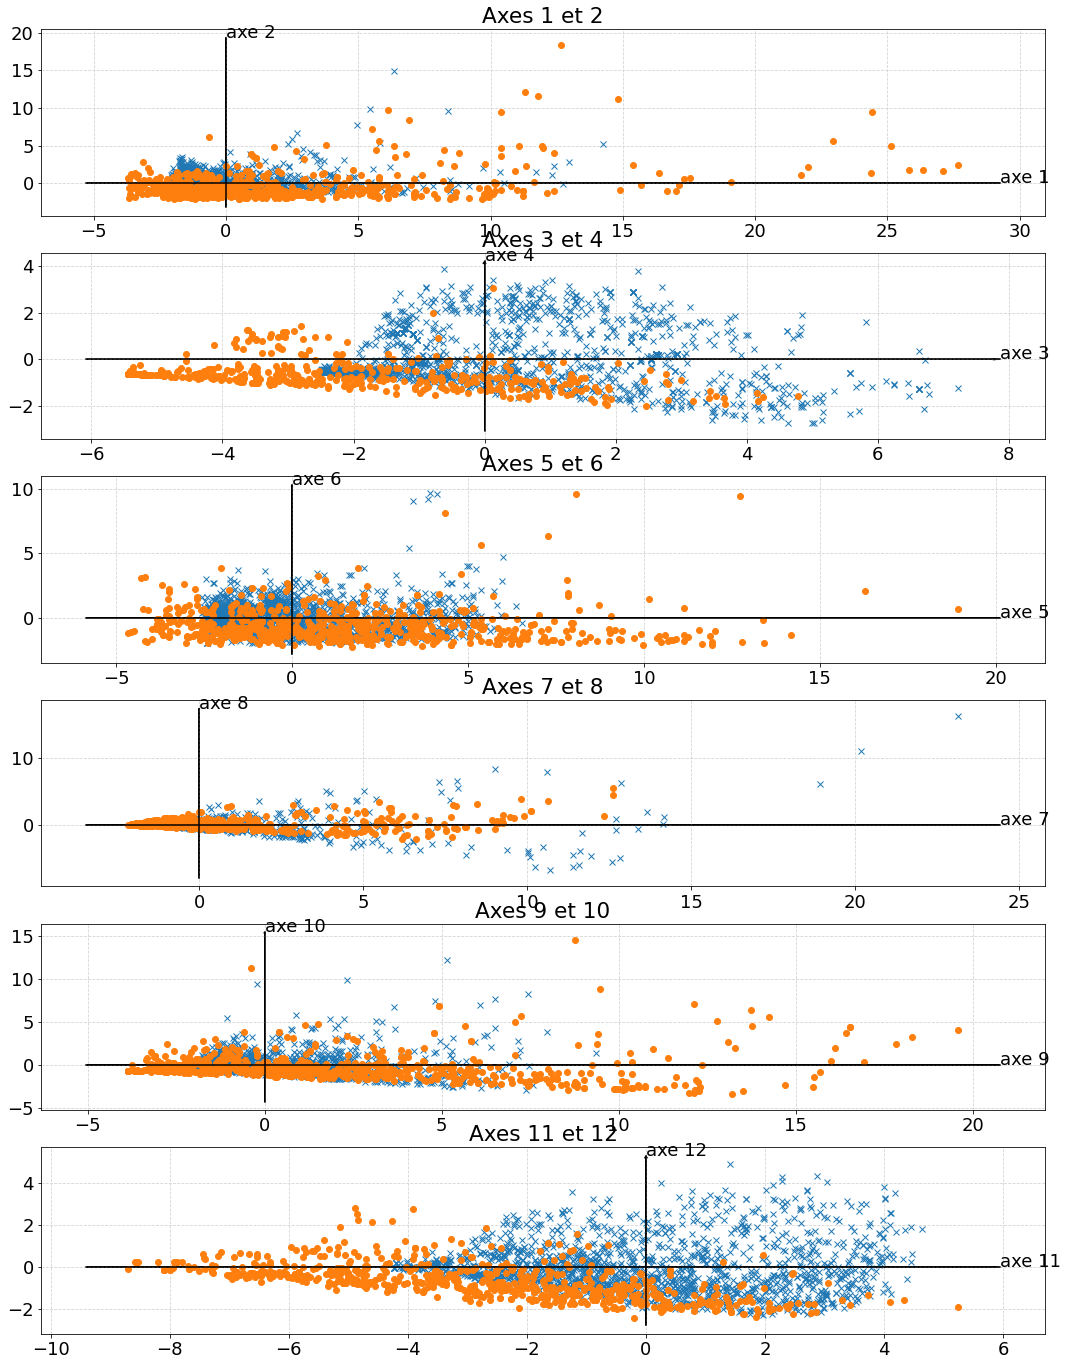

In [ ]:
cpt = 0
plt.subplots(figsize=(18,6*d))
for (i,j) in [(0,1),(2,3),(4,5),(6,7),(8,9),(10,11)]:
  cpt += 1
  ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
  plt.plot(PCA[:,i],PCA[:,j],'x')
  plt.plot(Proj[:,i],Proj[:,j],'o')
  plt.title('Axes {} et {}'.format(i+1,j+1))
  # Ajouter les axes
  plt.grid(color='lightgray',linestyle='--')
  x_lim = plt.xlim()
  ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
  plt.plot(plt.xlim(), np.zeros(2),'k-')
  plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
  y_lim = plt.ylim()
  ax.arrow(0,y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
  plt.plot(np.zeros(2),plt.ylim(),'k-')
  plt.text(0,y_lim[1], "axe {:d}".format(j+1))